# Global Power Plant Database
***

###### Batch - DS0422
###### Submitted by - Akash Shrivastava
***

### Problem Statement:

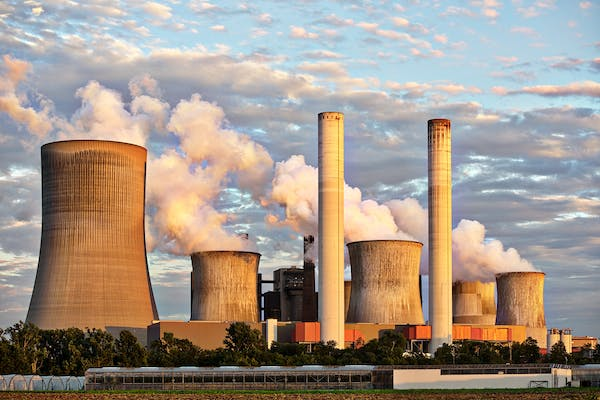

###### Description

**The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.**

**Key attributes of the database**
*The database includes the following indicators:*

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017

*Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories.*

###### Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

*Find the dataset link below.*

**Downlaod Files:**
https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv
***

- ###### Importing required libraries

In [1]:
import numpy as np  #---- for computation
import pandas as pd #---- for dataframe dependencies

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# for stats
from scipy import stats

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

- ###### Importing casestudy dataset(.csv_file)

In [2]:
df=pd.read_csv('database_IND.csv')

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print('No. Of Rows -',df.shape[0])
print('No. Of Columns -',df.shape[1])

No. Of Rows - 907
No. Of Columns - 27


In [5]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
df.shape

(907, 27)

- ###### Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

##### Comment - 

- *Dataset contains 907 rows and 27 columns.*
- *Some features are object datatype(i.e 12) and float datatypes (i.e 15)*
- *Dataset also have missing values in many columns and for exact counts* ,**lets check the null values present in the data** 

### Data Integrity Check 

In [9]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

###### Comment -  

- **We can observe that there is lot of missing data in certaiin columns.**
- **Also, there is lot of Non relevant data like gppd_idnr,url and many more.**
- **latitude and longitude have 46 missing values**
- **other_fuel1, other_fuel2 and other_fuel3 are having large number of missing values**
- **commissioning_year year have 380 null values and oweners information also missing**
- **wepp_id is completely missing**
- **some of the important columns having missing values near about 500, we will decide later, we need to drop or fill the columns.**

###### Let's check if any whitespace,'?'  'NA' orr '-' exist in dataset

In [10]:
df.isin([' ','NA','-','?']).sum().any()

False

###### Commet -

- *No whitespace , NA,'-' exist in dataset.*

**Since dataset is large,Let's check for any entry which is repeated or duplicated in dataset.**

In [11]:
df.duplicated().sum()  

0

######  Comment - There is no duplicate entry inn present data.

###### Before checking null value and missing value imputation,first remove empty columns and non relevant columns.

**Columns we are going remove are :**

- estimated_generation_gwh - Empty
- wepp_id - Empty
- other_fuel2 - 98% data missing
- other_fuel3 - Empty
- owner - More than 60 % data missing
- year_of_capacity_data - Missing data with single unique value
- country - non relevalent info
- country_long - non relevalent info
- gppd_idnr -non relevalent info
- url - No missing value but of no use

In [12]:
df.drop(columns=['country',
                'country_long',
                'gppd_idnr',
                 'other_fuel1',
                 'other_fuel2',
                 'other_fuel3',
                 'wepp_id',
                 'url',
                 'geolocation_source',
                'year_of_capacity_data',
                'generation_data_source',
                 'estimated_generation_gwh',
                 'source']
        , inplace= True, axis= 1)

In [13]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                     Missing Values  % Missing data
generation_gwh_2013             907      100.000000
generation_gwh_2019             907      100.000000
owner                           565       62.293275
generation_gwh_2014             509       56.119074
generation_gwh_2015             485       53.472988
generation_gwh_2016             473       52.149945
generation_gwh_2017             467       51.488423
generation_gwh_2018             459       50.606395
commissioning_year              380       41.896362
latitude                         46        5.071665
longitude                        46        5.071665
name                              0        0.000000
capacity_mw                       0        0.000000
primary_fuel                      0        0.000000


##### Filling Null Values

In [14]:
df.isnull().sum()

name                     0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

In [15]:
df['generation_gwh_2013'].fillna(value=df['generation_gwh_2013'].median(), inplace=True)
df['generation_gwh_2014'].fillna(value=df['generation_gwh_2014'].median(), inplace=True)
df['generation_gwh_2015'].fillna(value=df['generation_gwh_2015'].median(), inplace=True)
df['generation_gwh_2016'].fillna(value=df['generation_gwh_2016'].median(), inplace=True)
df['generation_gwh_2017'].fillna(value=df['generation_gwh_2017'].median(), inplace=True)
df['generation_gwh_2018'].fillna(value=df['generation_gwh_2018'].median(), inplace=True)
df['generation_gwh_2019'].fillna(value=df['generation_gwh_2019'].median(), inplace=True)

In [16]:
df['latitude'].fillna(value=df['latitude'].median(), inplace=True)
df['longitude'].fillna(value=df['longitude'].median(), inplace=True)

In [17]:
df.isnull().sum()

name                     0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2013    907
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
generation_gwh_2019    907
dtype: int64

### EDA 

##### Univariate analysis

Text(0, 0.5, 'primary_fuel')

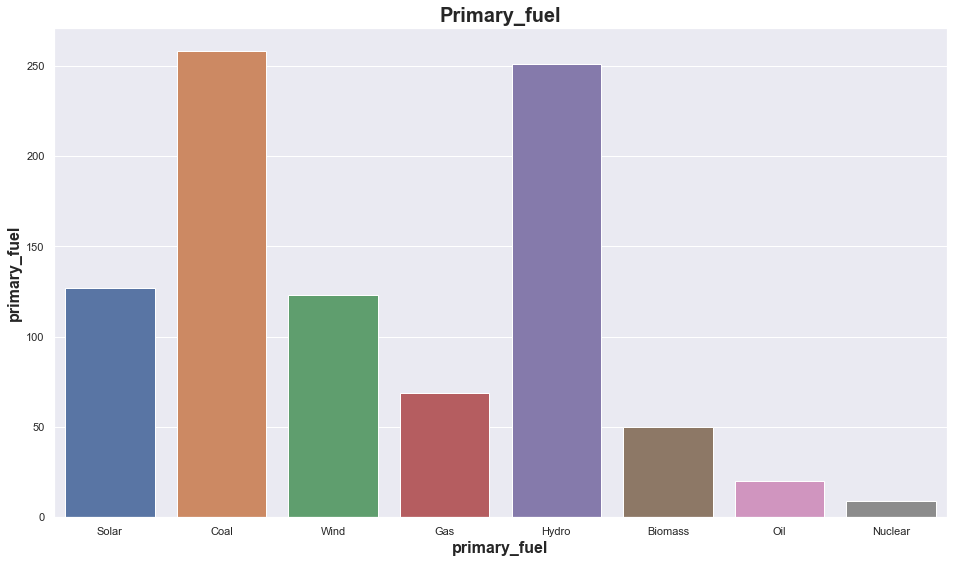

In [18]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=[16,9])
plt.title("Primary_fuel",fontsize = 20,fontweight='bold')
sns.countplot(df['primary_fuel'])
plt.xlabel('primary_fuel',fontsize =16,fontweight='bold')
plt.ylabel('primary_fuel',fontsize =16,fontweight='bold')

In [19]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

##### Comment -

- **Maximum number of powerplant are coal based powerplant followed by Hydro energy based powerplants.**
- **Around 40 % Power plant are Unconventional powerplant mainly based on Non Renewable energy resorces.**
- **There are only 9 Nuclear powerplant. Usually these powerplant build for high capacity. It will be interesting to look for capacity of these powerplant.**

##### Let us find Total Generation capacity of all powerplant,afterwardds we will look for capcity of powerplant accordinng to fuel type.

In [20]:
print('Total power generation capacity of all power plants:',df['capacity_mw'].sum(),'MW')

Total power generation capacity of all power plants: 295884.946 MW


###### India's Total Power Generation Capacity is   295884.946 MW.

In [21]:
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [22]:
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,2002.0,NaN,NaN,27594.0,29047.0,30015.0,35116.0,35136.0,NaN


In [23]:
df.loc[df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,Tata BP Solar India Limited,NaN,801.123775,711.181225,737.20545,817.97725,751.644375,NaN


##### Comment :

- Biggest powerplant in India as per database is VINDH_CHAL STPS with Power generation capacity of 4760 MW. As Name suggest it is Thermal powerplant with Coal as Primary Fuel and alternate fuel is oil. It is commission in year 2002.
- Smallest power plant is mention as Tata BP - Electronics City Solar Panel Plant with capacity of 0 MW. This must be data entry error as If powerplant is commission it cannot have capacity of 0 MW.

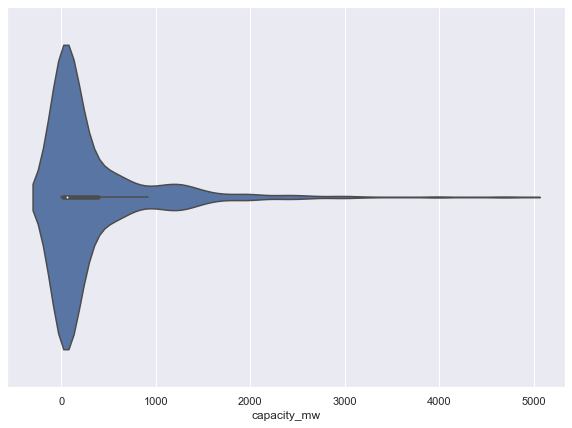

In [24]:
plt.figure(figsize=(10,7))
sns.violinplot(df.capacity_mw)
plt.show()

###### We can observe that there are very few powerplants of capacity more than 1500 MW. 

In [25]:
df.loc[df.capacity_mw>1500].shape

(39, 14)

###### There are only 14  powerplant of capacity more than 1500 MW. 

In [26]:
pd.crosstab(df['capacity_mw'],df['primary_fuel'],margins=True).T.style.background_gradient(cmap='summer_r')

In [27]:
df['capacity_mw'].groupby(df['primary_fuel']).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


##### Comment - Out of Total Power Generation Maximum comes from coal.

*Power Generation capacity of Nuclear powerplants is greater than Unconventional Energy sources based powerplant (biomass, wind,solar) combined.*

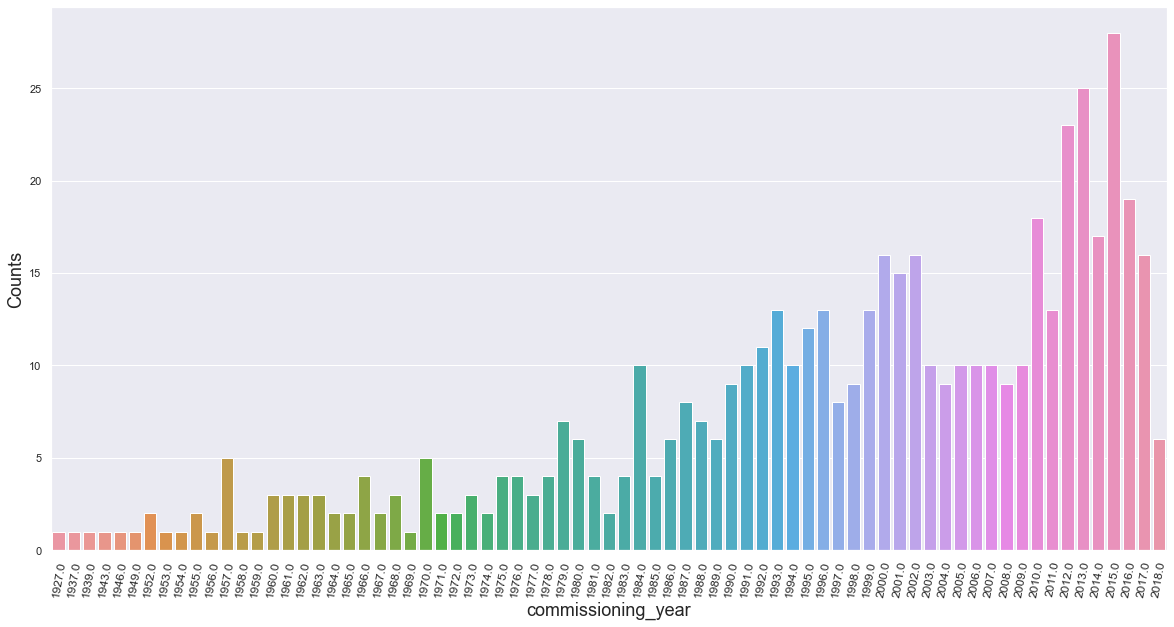

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(df['commissioning_year'])
plt.xlabel('commissioning_year',fontsize = 18)
plt.ylabel('Counts',fontsize = 18)
locs, labels = plt.xticks(fontsize=12)
plt.setp(labels,rotation=80)
plt.show()

##### Comment - We can observe that first power plant in india was built-in 1927 . The count was very low 1956. From 1957 there was substantial growth till today.

In [29]:
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

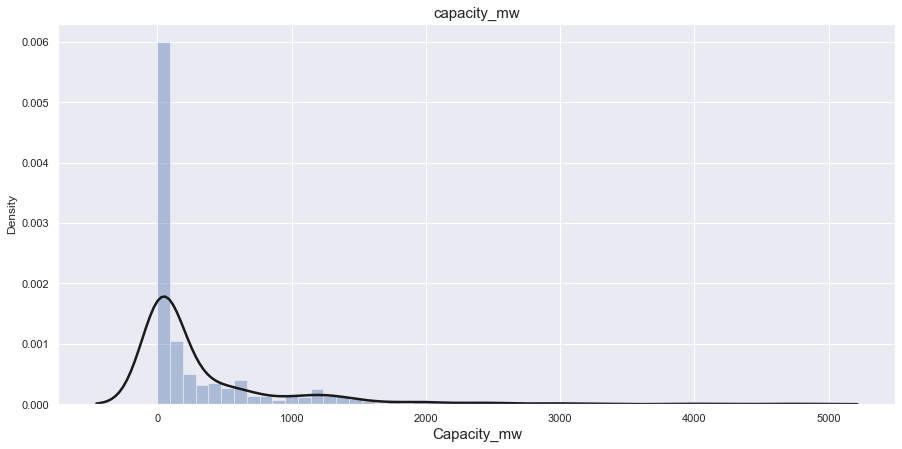

In [30]:
plt.figure(figsize=(15,7))

sns.distplot(df['capacity_mw'], color='b',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('capacity_mw', fontsize=15)
plt.xlabel('Capacity_mw', fontsize=15)
plt.show()

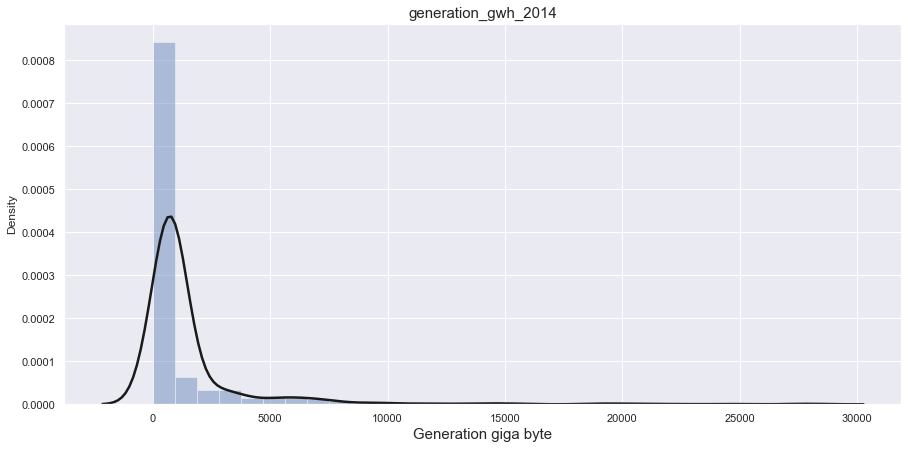

In [31]:
plt.figure(figsize=(15,7))

sns.distplot(df['generation_gwh_2014'], color='b',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2014', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

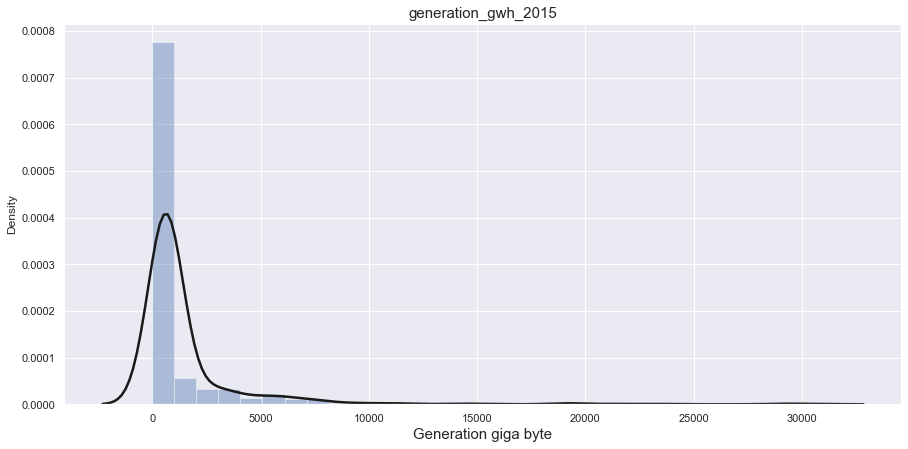

In [32]:
plt.figure(figsize=(15,7))

sns.distplot(df['generation_gwh_2015'], color='b',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2015', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

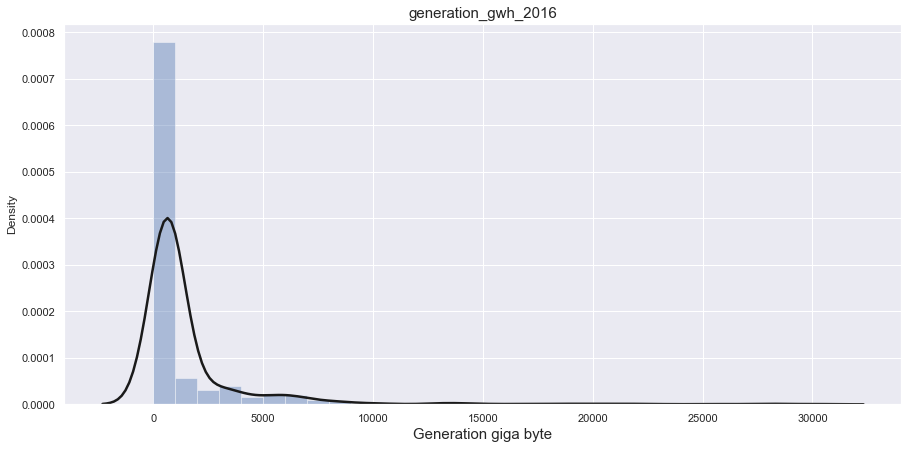

In [33]:
plt.figure(figsize=(15,7))

sns.distplot(df['generation_gwh_2016'], color='b',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2016', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

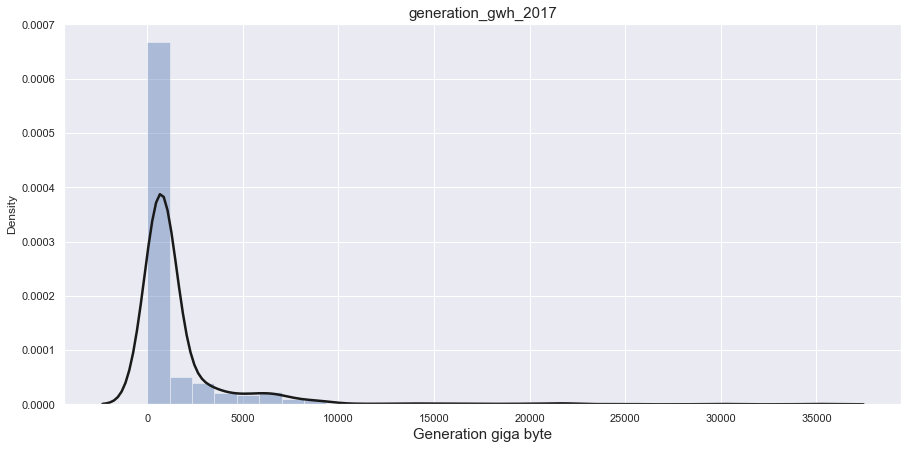

In [34]:
plt.figure(figsize=(15,7))

sns.distplot(df['generation_gwh_2017'], color='b',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2017', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

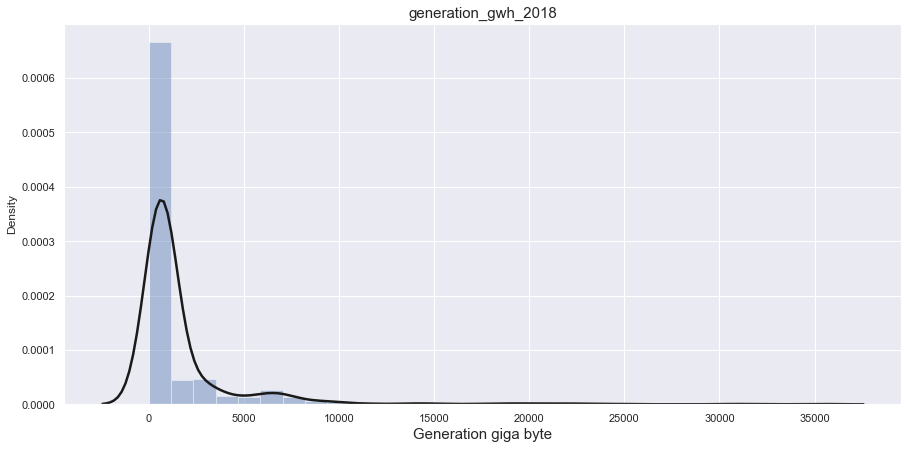

In [35]:
plt.figure(figsize=(15,7))

sns.distplot(df['generation_gwh_2018'], color='b',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2018', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

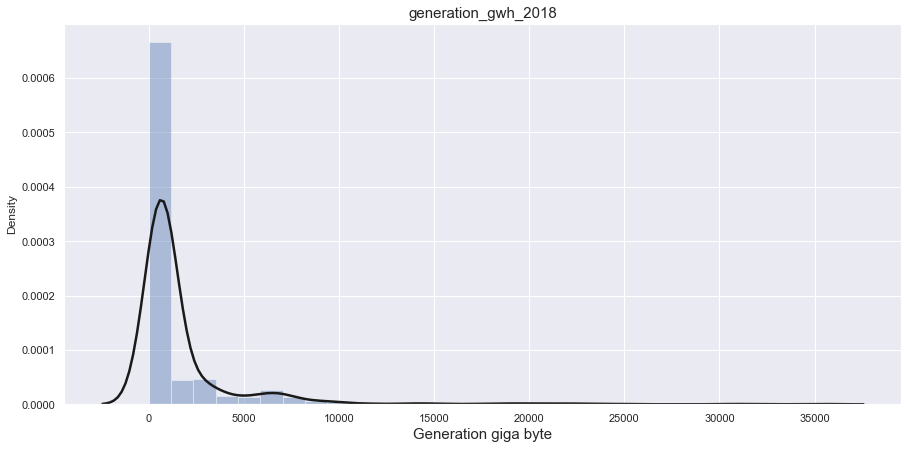

In [36]:
plt.figure(figsize=(15,7))

sns.distplot(df['generation_gwh_2018'], color='b',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2018', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

##### Comment - Above distplot data is not distributed normally , it is having skewness.

##### Bivariate Analysis

**In bivariate analysis , we will analyse the feature columns against target column.**

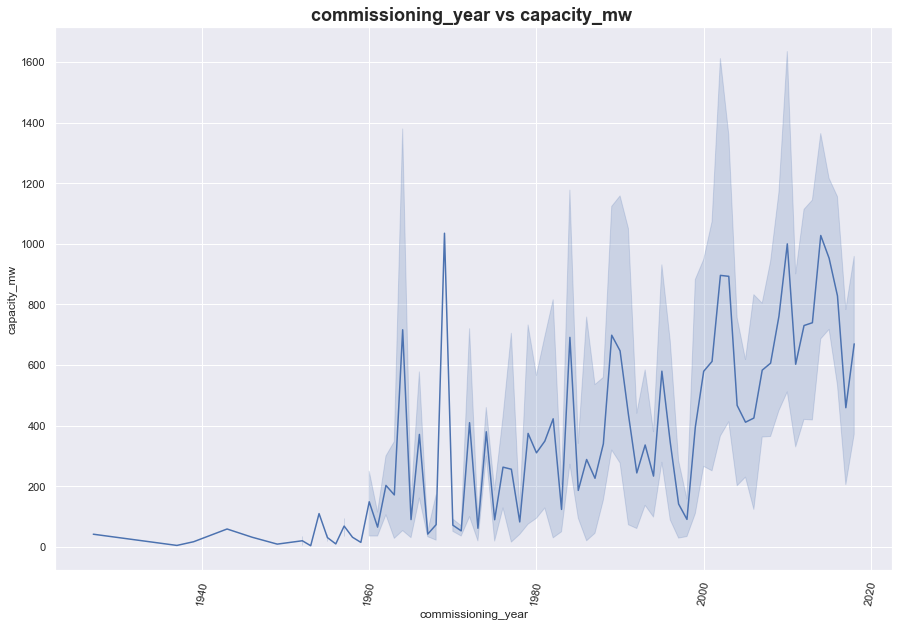

In [37]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='commissioning_year',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('commissioning_year vs capacity_mw ', fontsize=18,fontweight='bold')
plt.setp(labels, rotation=80)
plt.show()

##### Comment - We can observe that with the increase in years there is increase in development of plants and also capacity is increased.

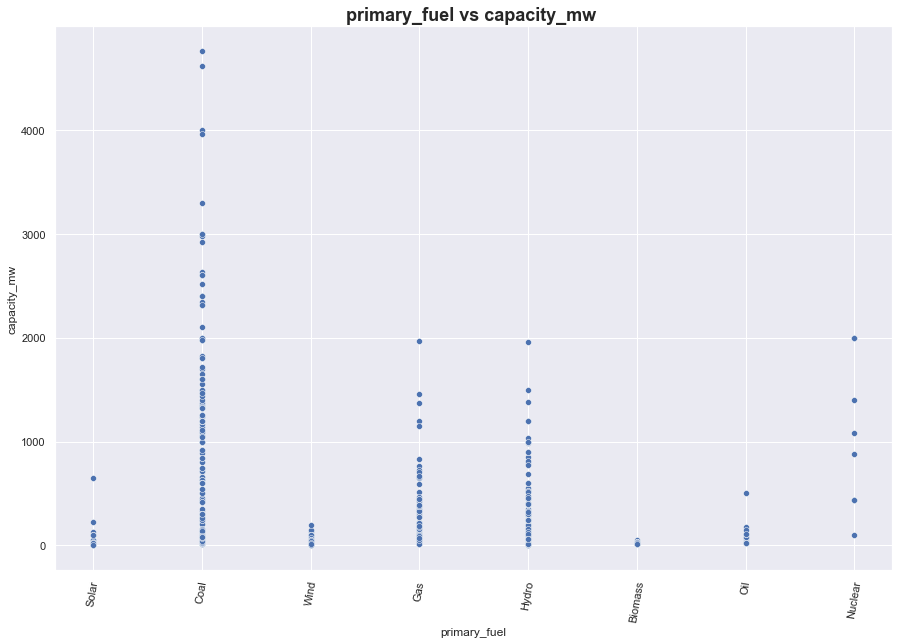

In [38]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='primary_fuel',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('primary_fuel vs capacity_mw ', fontsize=18,fontweight='bold')
plt.setp(labels, rotation=80)
plt.show()

#####  Comment -  We can observe that highest power capacity is due to coal.

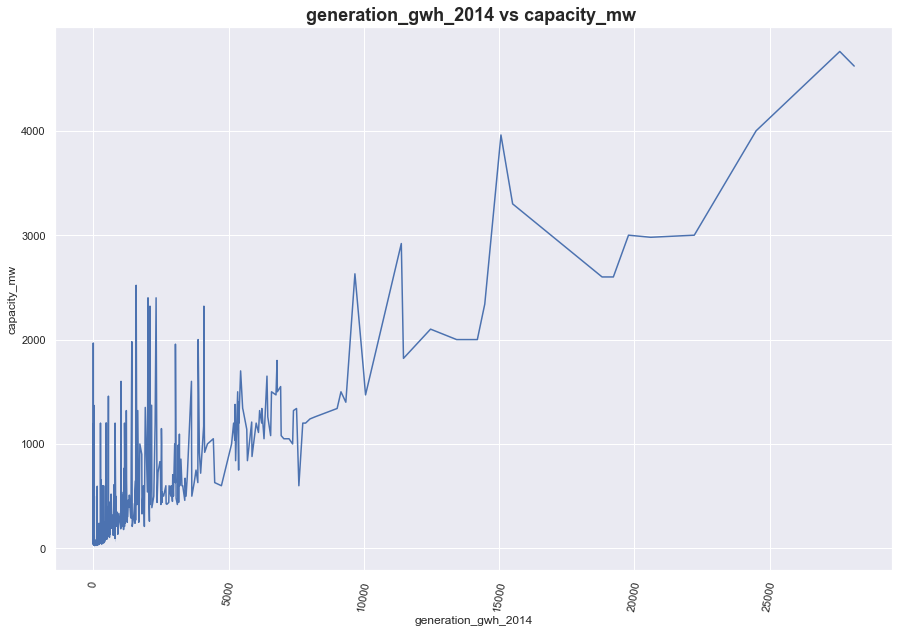

In [39]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='generation_gwh_2014',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=18,fontweight='bold')
plt.setp(labels, rotation=80)
plt.show()

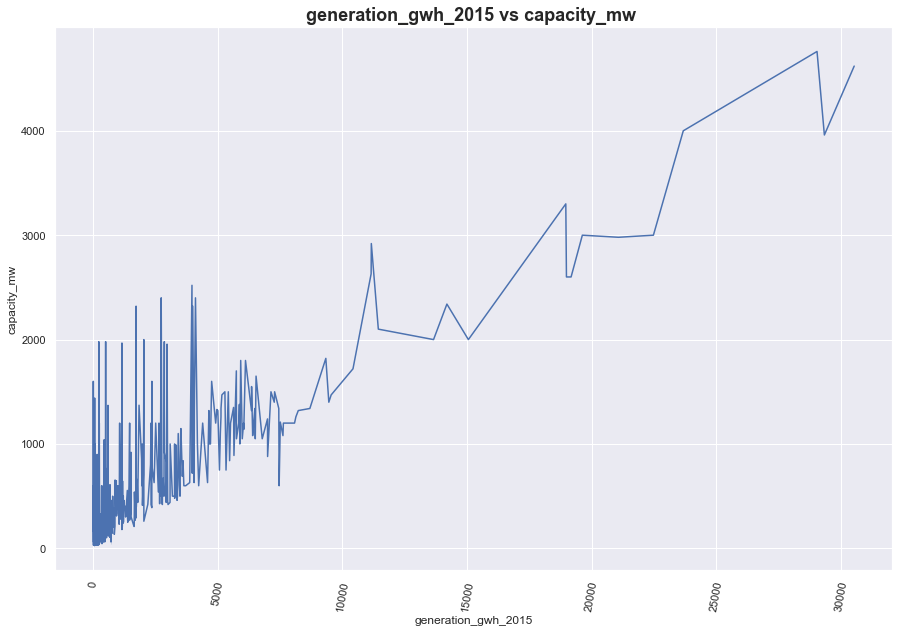

In [40]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='generation_gwh_2015',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2015 vs capacity_mw ', fontsize=18,fontweight='bold')
plt.setp(labels, rotation=80)
plt.show()

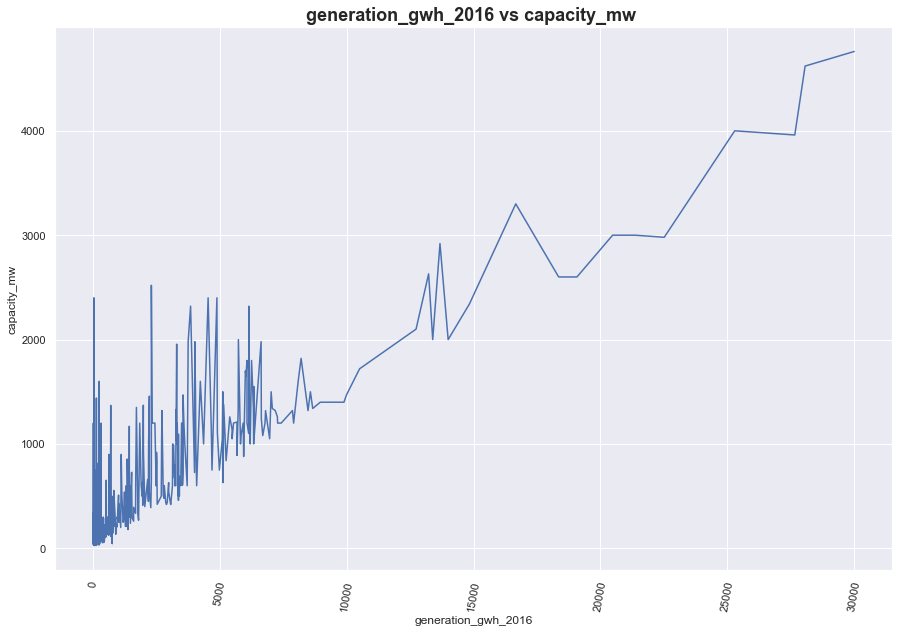

In [41]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='generation_gwh_2016',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2016 vs capacity_mw ', fontsize=18,fontweight='bold')
plt.setp(labels, rotation=80)
plt.show()

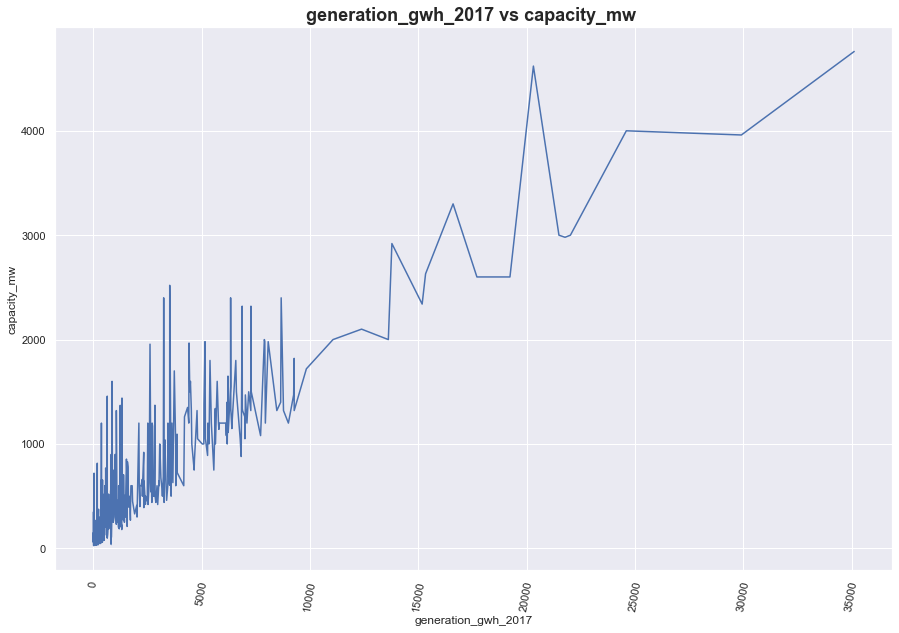

In [42]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='generation_gwh_2017',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2017 vs capacity_mw ', fontsize=18,fontweight='bold')
plt.setp(labels, rotation=80)
plt.show()

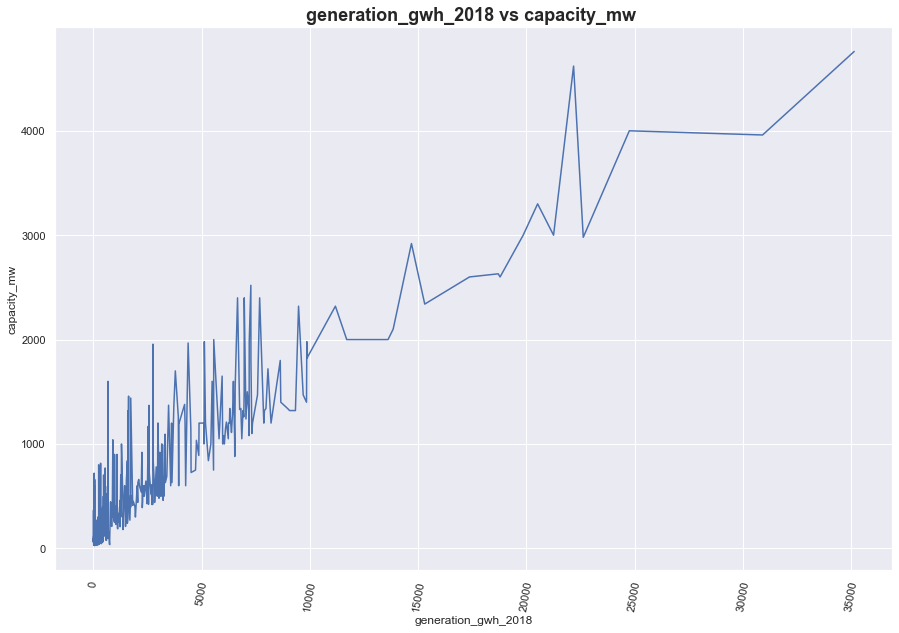

In [43]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='generation_gwh_2018',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2018 vs capacity_mw ', fontsize=18,fontweight='bold')
plt.setp(labels, rotation=80)
plt.show()

##### Comment - We can observe that with higher capacity , generation_gwh in every year is increasing.

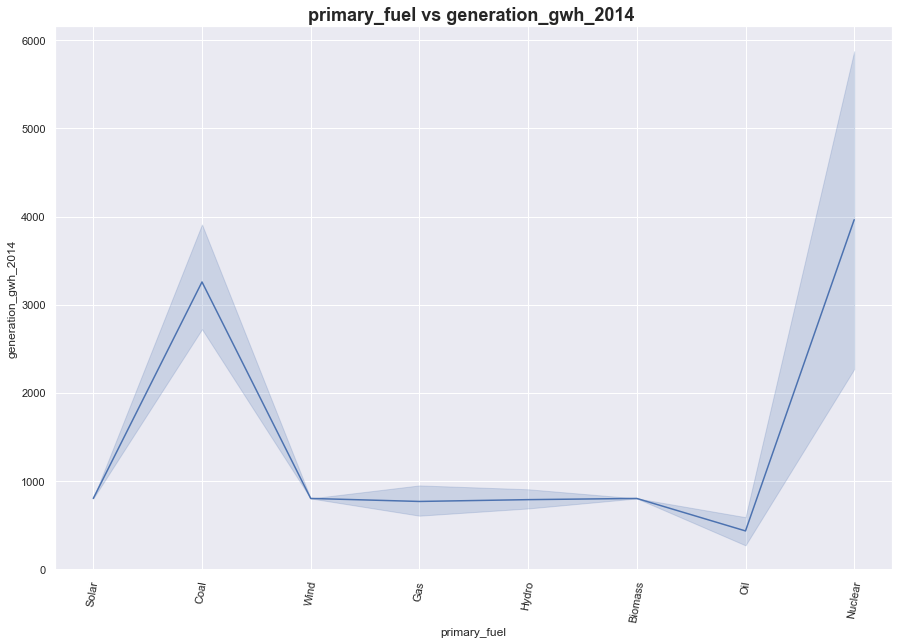

In [44]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2014')
locs, labels = plt.xticks()
plt.title('primary_fuel vs generation_gwh_2014 ', fontsize=18,fontweight='bold')
plt.setp(labels, rotation=80)
plt.show()

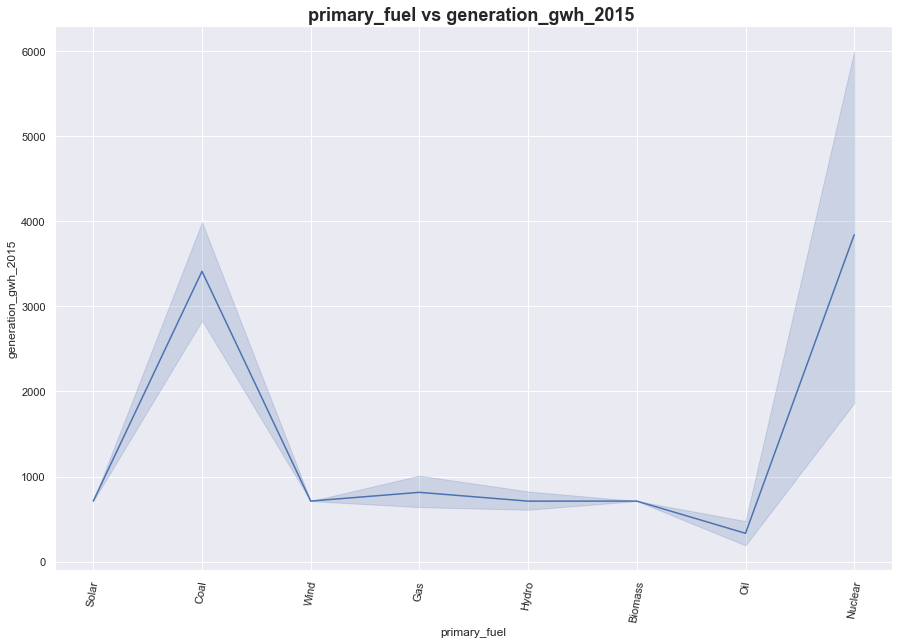

In [45]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2015')
locs, labels = plt.xticks()
plt.title('primary_fuel vs generation_gwh_2015 ', fontsize=18,fontweight='bold')
plt.setp(labels, rotation=80)
plt.show()

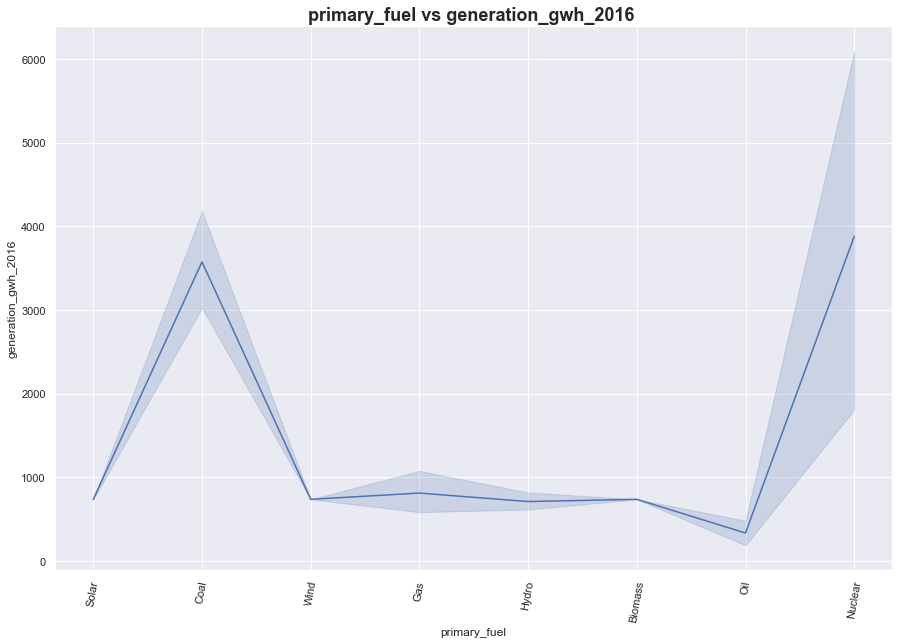

In [46]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2016')
locs, labels = plt.xticks()
plt.title('primary_fuel vs generation_gwh_2016 ', fontsize=18,fontweight='bold')
plt.setp(labels, rotation=80)
plt.show()

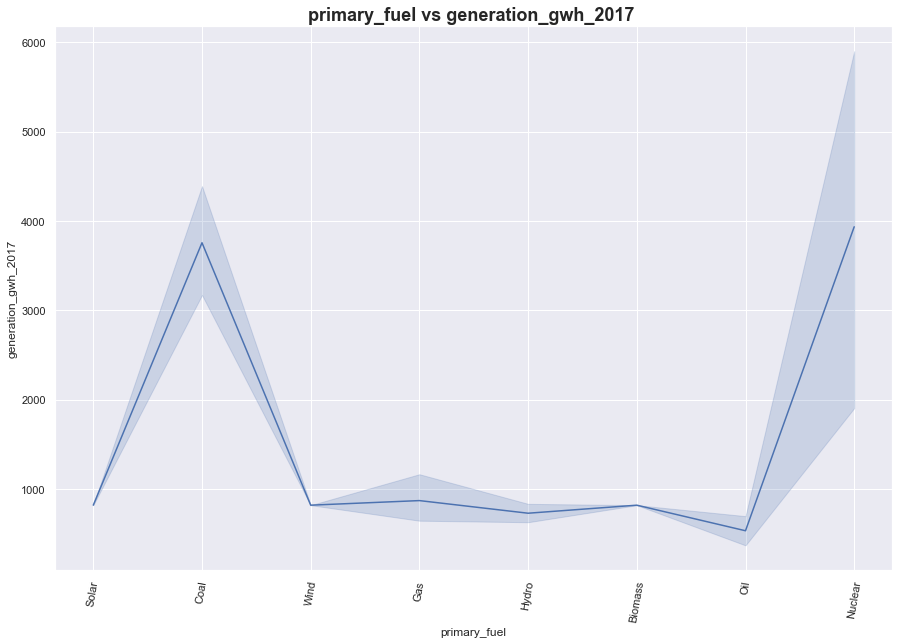

In [47]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2017')
locs, labels = plt.xticks()
plt.title('primary_fuel vs generation_gwh_2017 ', fontsize=18,fontweight='bold')
plt.setp(labels, rotation=80)
plt.show()

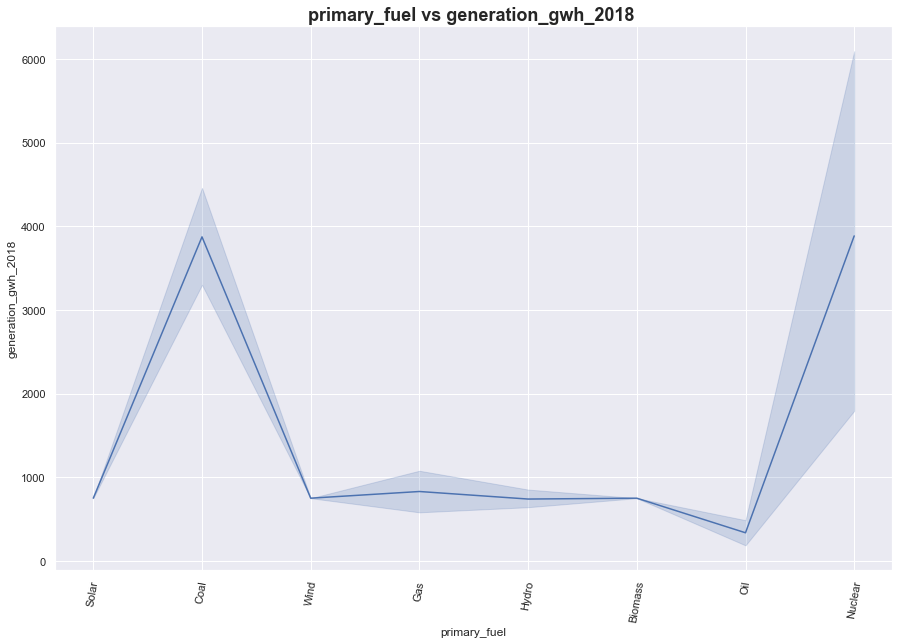

In [48]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2018')
locs, labels = plt.xticks()
plt.title('primary_fuel vs generation_gwh_2018 ', fontsize=18,fontweight='bold')
plt.setp(labels, rotation=80)
plt.show()

##### Comment - We can observe that coal is the primary fuel for power generation 

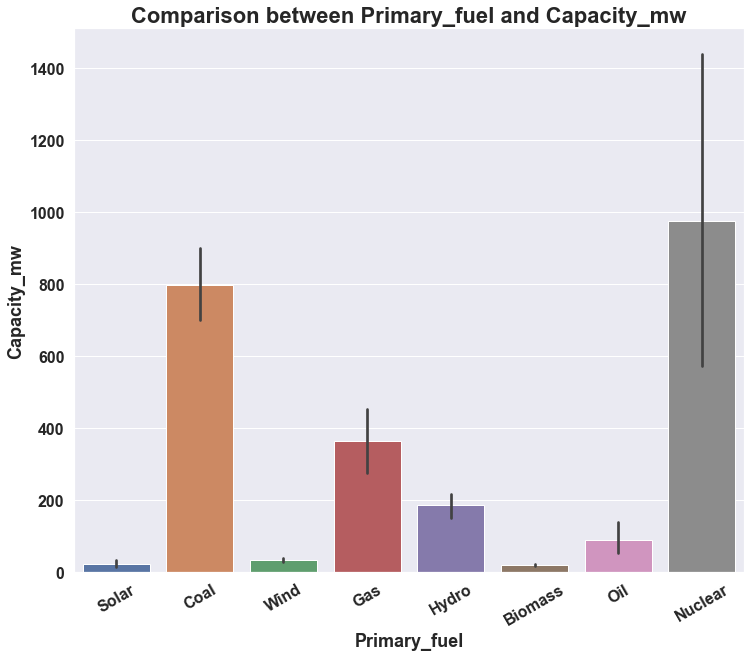

In [49]:
#Let's checck the relation between primary_fuel and average capacity_mw
plt.figure(figsize=(12,10))
y = df['capacity_mw']
p=sns.barplot(x = 'primary_fuel',y = 'capacity_mw',data=df)
plt.title('Comparison between Primary_fuel and Capacity_mw', fontsize =22 ,fontweight ='bold')
p.set_xlabel('Primary_fuel', fontsize =18 ,fontweight ='bold')
p.set_ylabel('Capacity_mw', fontsize =18 ,fontweight ='bold')
plt.xticks(fontsize=16,fontweight='bold',rotation=30)
plt.yticks(fontsize=16,fontweight='bold')
plt.show()

##### Comment - From above results its is obvious as only 9 Nuclear powerplants is present so its mean capacity is higher.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

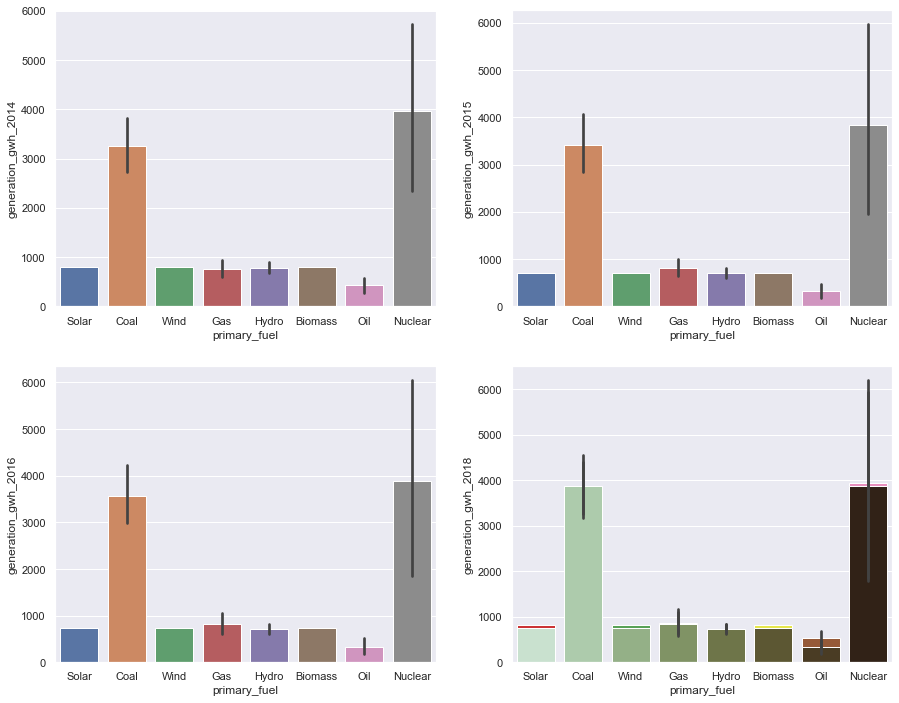

In [50]:
fig,axes = plt.subplots(2,2,figsize=(15,12))
# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,0],data=df)
# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[0,1],data=df)
# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,0],data=df)
# Checking generation growth in 2017
sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,1],data=df,palette='Set1')
# Checking generation growth in 2018
sns.barplot(x='primary_fuel',y='generation_gwh_2018',ax=axes[1,1],data=df,palette='ch:25')

##### Comment - 

- ###### Nuclear powerplant have high mean electrical power generation ,i.e reason being high efficiency of nuclear powerplants followed by coal.
- ###### fuel types contributed less to power generation and it depends on following reasons-
  -- availability
  -- efficiency

####  Location vs Primary Fuel

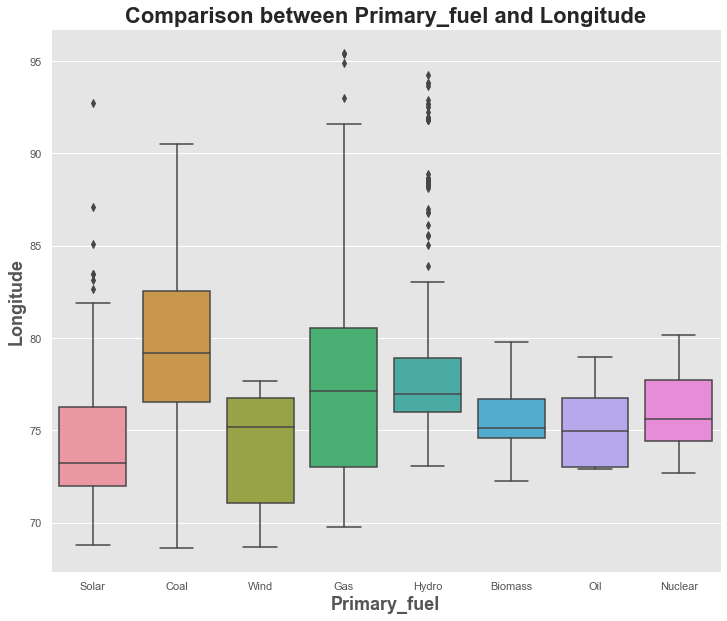

In [51]:
# Let's check how primary fuel is related to longitude of power plant
plt.figure(figsize=(12,10))
plt.style.use('ggplot')
plt.title('Comparison between Primary_fuel and Longitude',fontsize = 22,fontweight = 'bold')
a=sns.boxplot(df['primary_fuel'],df['longitude'])
a.set_xlabel('Primary_fuel', fontsize =18 ,fontweight ='bold')
a.set_ylabel('Longitude', fontsize =18 ,fontweight ='bold')
plt.show()

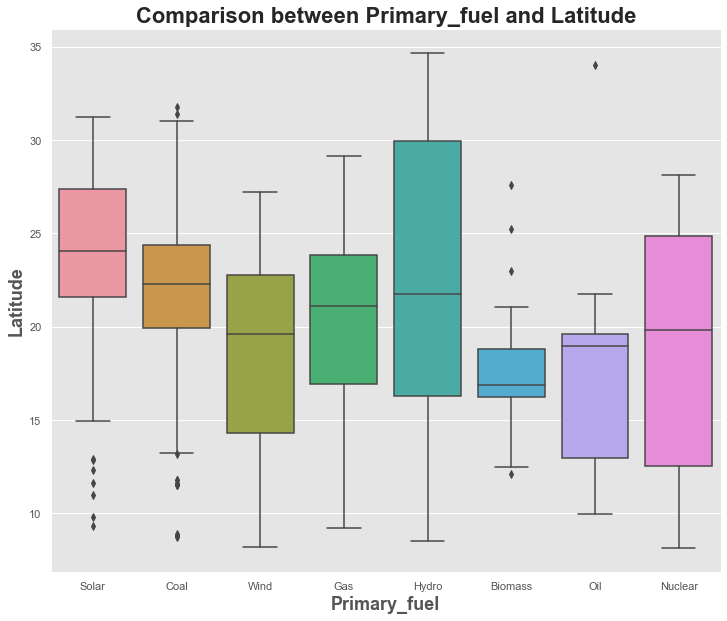

In [52]:
# Let's check how primary fuel is related to latitude of power plant
plt.figure(figsize=(12,10))
plt.style.use('ggplot')
plt.title('Comparison between Primary_fuel and Latitude',fontsize = 22,fontweight = 'bold')
a=sns.boxplot(df['primary_fuel'],df['latitude'])
a.set_xlabel('Primary_fuel', fontsize =18 ,fontweight ='bold')
a.set_ylabel('Latitude', fontsize =18 ,fontweight ='bold')
plt.show()

##### Comment -

- Location is important feature specially for Nuclear powerplants. These plants lies in between 15 to 25 latitude and longitudnal range of 75 to 88 degree.
- We can also observe solar power plant are mostly establish in certain range of latitude and longitude. This might be due to clear and intense sunlight with minimum humidity.

#### Location vs Capacity

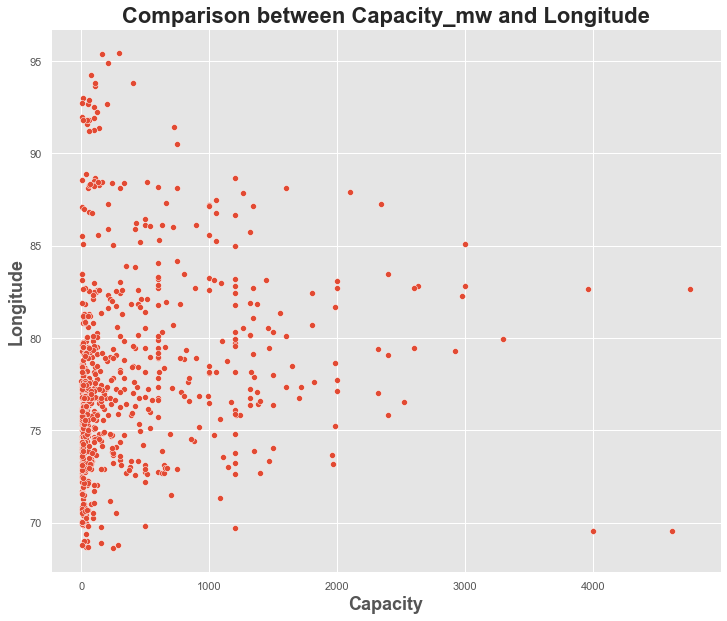

In [53]:
# Let's check how capacity is related to longitude of power plant
plt.figure(figsize=(12,10))
plt.style.use('ggplot')
plt.title('Comparison between Capacity_mw and Longitude',fontsize = 22,fontweight = 'bold')
a=sns.scatterplot(df['capacity_mw'],df['longitude'])
a.set_xlabel('Capacity', fontsize =18 ,fontweight ='bold')
a.set_ylabel('Longitude', fontsize =18 ,fontweight ='bold')
plt.show()

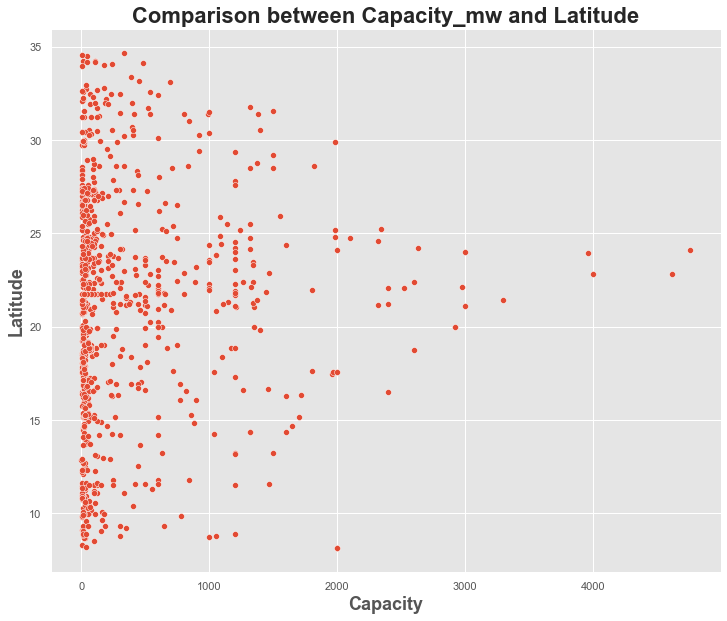

In [54]:
# Let's check how capacity is related to latitude of power plant
plt.figure(figsize=(12,10))
plt.style.use('ggplot')
plt.title('Comparison between Capacity_mw and Latitude',fontsize = 22,fontweight = 'bold')
a=sns.scatterplot(df['capacity_mw'],df['latitude'])
a.set_xlabel('Capacity', fontsize =18 ,fontweight ='bold')
a.set_ylabel('Latitude', fontsize =18 ,fontweight ='bold')
plt.show()

In [55]:
df.drop(columns=['generation_gwh_2013','generation_gwh_2019']
        , inplace= True, axis= 1)

### Multivariate Analysis

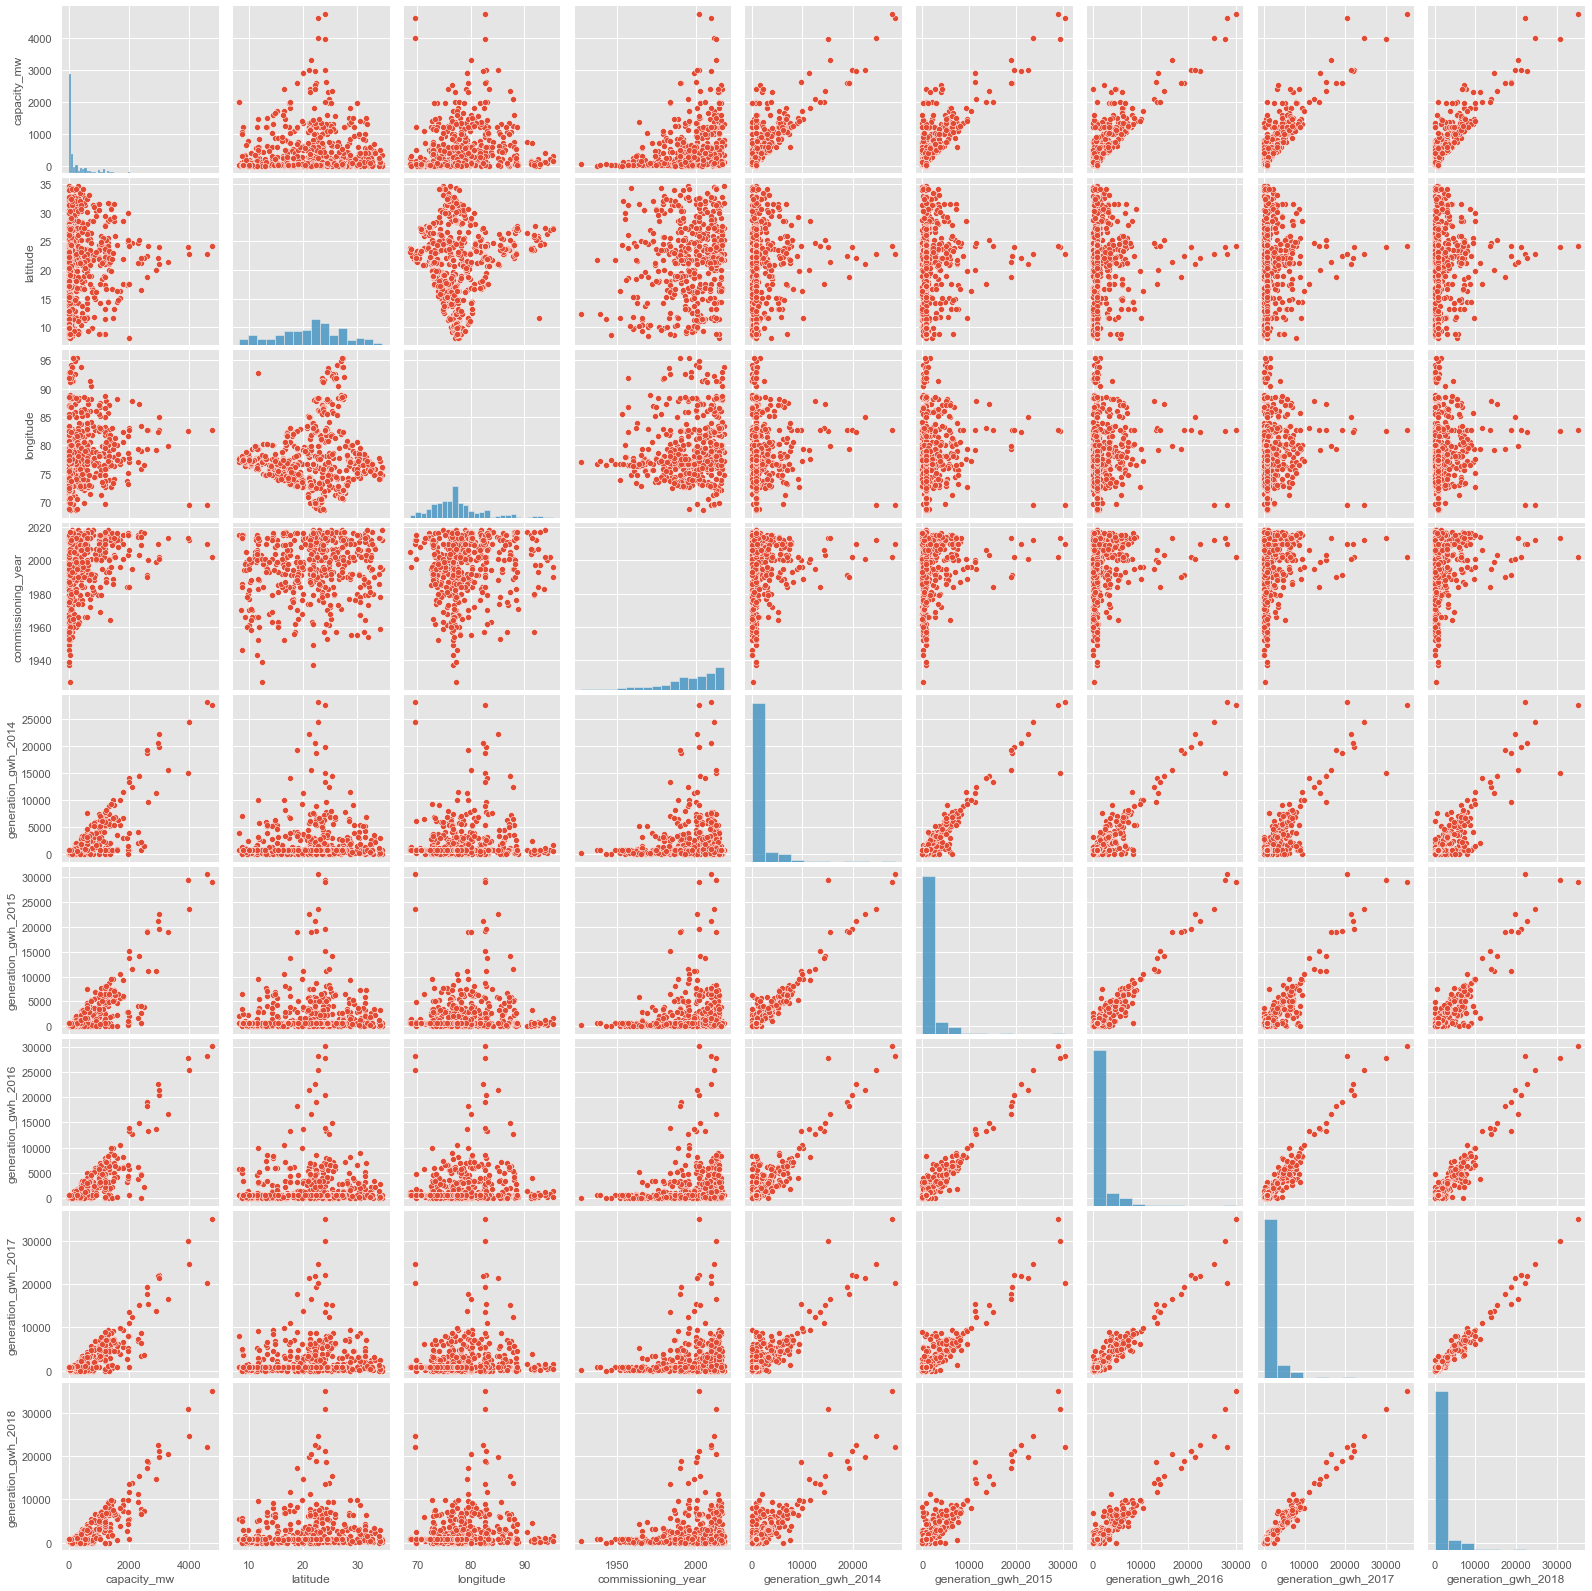

In [56]:
sns.pairplot(df)

##### Data Processing

In [57]:
df.drop(columns=['name','owner','commissioning_year']
        , inplace= True, axis= 1)

#### Encoding Target Columns

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])

In [59]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [60]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.048790,0.199299,-0.380395,0.793497,0.819676,0.853008,0.868338,0.884840
latitude,0.048790,1.000000,0.035619,-0.007538,0.057179,0.052422,0.046267,0.056407,0.053700
longitude,0.199299,0.035619,1.000000,-0.352056,0.106855,0.123763,0.145640,0.154014,0.157405
primary_fuel,-0.380395,-0.007538,-0.352056,1.000000,-0.240656,-0.249304,-0.259708,-0.263599,-0.271198
generation_gwh_2014,0.793497,0.057179,0.106855,-0.240656,1.000000,0.963719,0.935067,0.904075,0.895143
generation_gwh_2015,0.819676,0.052422,0.123763,-0.249304,0.963719,1.000000,0.973231,0.940229,0.933161
generation_gwh_2016,0.853008,0.046267,0.145640,-0.259708,0.935067,0.973231,1.000000,0.973909,0.964988
generation_gwh_2017,0.868338,0.056407,0.154014,-0.263599,0.904075,0.940229,0.973909,1.000000,0.986685
generation_gwh_2018,0.884840,0.053700,0.157405,-0.271198,0.895143,0.933161,0.964988,0.986685,1.000000


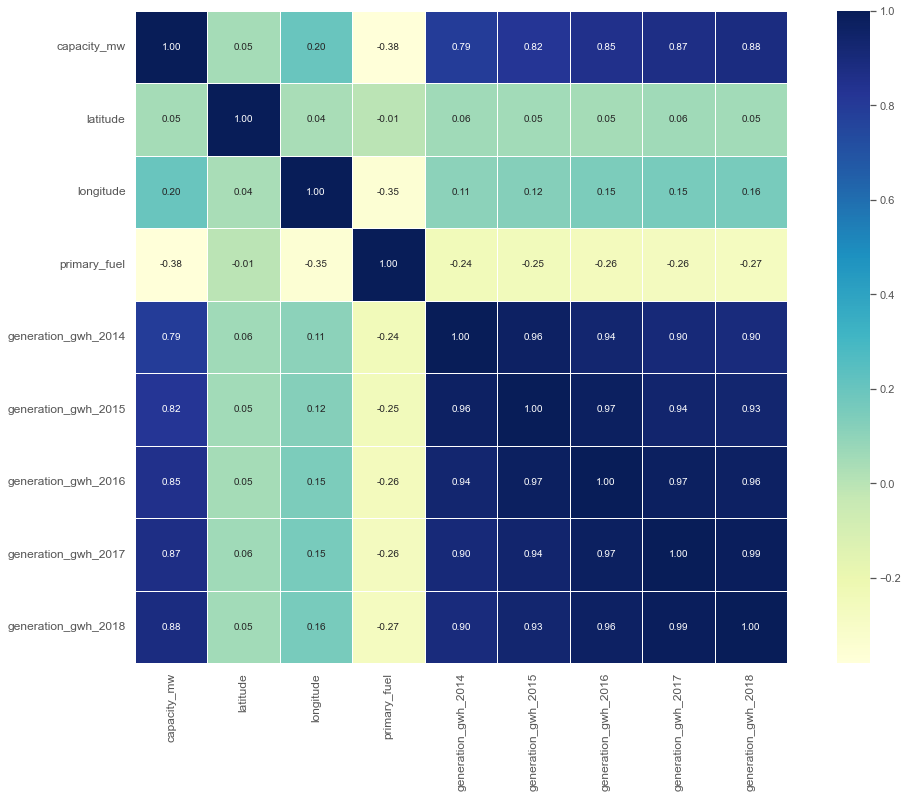

In [61]:
# plotting correlation
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True,square=True, fmt='0.2f',linewidths=1,linecolor='white',cmap="YlGnBu")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

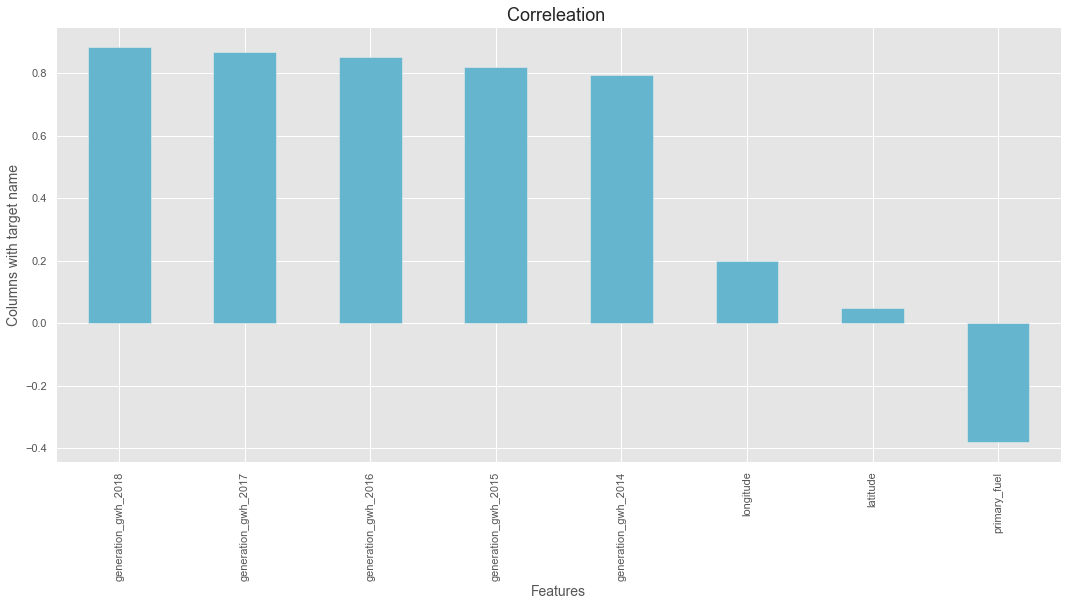

In [62]:
plt.figure(figsize=(18,8))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Columns with target name',fontsize=14)
plt.title('Correleation ',fontsize=18)
plt.show()

##### Comment -

- The label capacity_mw is highly positively correlated with the features generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018.
- Primary_fuel is negatively correlated with capacity megawatt,all other parameters are having strong positive correlation

### Outliers Detection and Removal

<AxesSubplot:>

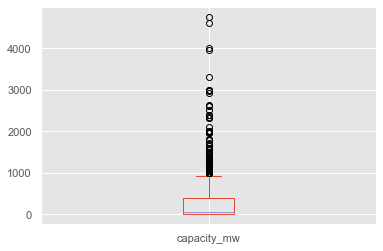

In [63]:
df['capacity_mw'].plot.box()

<AxesSubplot:>

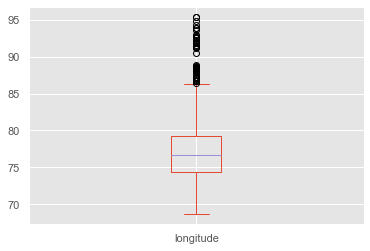

In [64]:
df['longitude'].plot.box()

<AxesSubplot:>

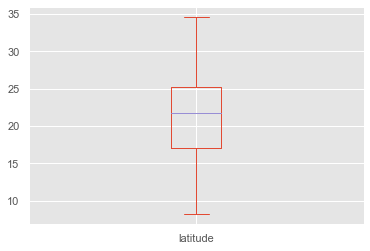

In [65]:
df['latitude'].plot.box()

<AxesSubplot:>

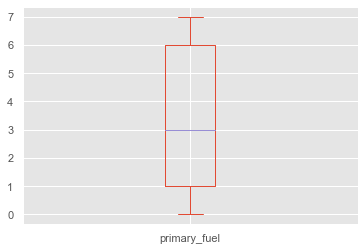

In [66]:
df['primary_fuel'].plot.box()

<AxesSubplot:>

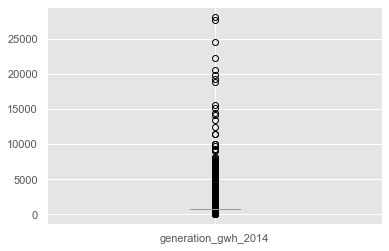

In [67]:
df['generation_gwh_2014'].plot.box()

<AxesSubplot:>

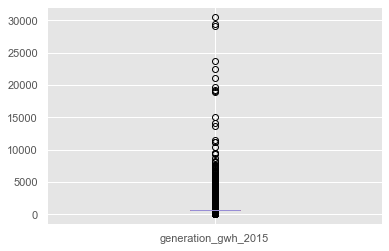

In [68]:
df['generation_gwh_2015'].plot.box()

<AxesSubplot:>

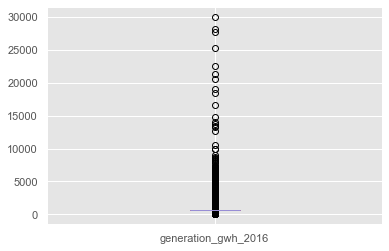

In [69]:
df['generation_gwh_2016'].plot.box()

<AxesSubplot:>

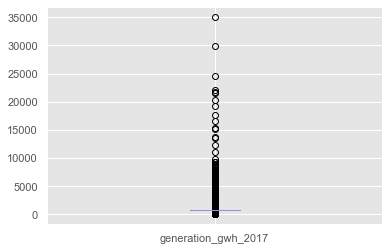

In [70]:
df['generation_gwh_2017'].plot.box()

<AxesSubplot:>

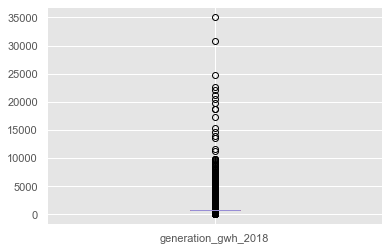

In [71]:
df['generation_gwh_2018'].plot.box()

##### Comment - Outliers are present,mostky in generation_gwh columns

In [72]:
from scipy.stats import zscore
z =np.abs(zscore(df))
threshold = 3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       179, 183, 209, 209, 209, 209, 209, 209, 244, 308, 308, 308, 308,
       308, 308, 323, 333, 340, 360, 363, 364, 364, 364, 364, 364, 364,
       375, 416, 427, 482, 482, 493, 493, 493, 493, 493, 493, 494, 494,
       494, 494, 494, 494, 499, 519, 532, 546, 577, 623, 638, 648, 648,
       648, 648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695,
       695, 695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724,
       726, 726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786,
       788, 808, 808, 808, 808, 808, 808, 818, 847, 880, 880, 880, 880,
       880, 880], dtype=int64), array([0, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 2, 2, 0, 4, 5, 6, 7, 8, 2,
       0, 4, 5, 6, 7, 8, 2, 2, 2, 2, 0, 0, 4, 5, 6, 7, 8, 0, 2, 2, 0, 8,
       0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 2, 2, 4, 2, 2, 4, 2, 0, 4, 5,
       6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5,
       6, 7, 8, 0, 4, 5, 6,

In [73]:
df1=df[(z<3).all(axis=1)]

In [74]:
print(df.shape)
print(df1.shape)

(907, 9)
(866, 9)


##### Data Loss

In [75]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((907-866)/907)*100,'%')

Percentage Data Loss : 4.5203969128996695 %


### Skewness

In [76]:
df1.skew()

capacity_mw            2.029125
latitude              -0.125873
longitude              0.963197
primary_fuel           0.417203
generation_gwh_2014    2.997212
generation_gwh_2015    2.798104
generation_gwh_2016    2.736037
generation_gwh_2017    2.633766
generation_gwh_2018    2.701508
dtype: float64

In [77]:
from sklearn.preprocessing import power_transform
# Divide the data into features and vectors.

x=df1.drop(['capacity_mw'],axis=1)
y=df1.iloc[:,0]

x=power_transform(x,method='yeo-johnson')

In [78]:
X=pd.DataFrame(data=x)

### Scaling the data using StandardScaler

In [79]:
from sklearn.preprocessing import StandardScaler
SDc=StandardScaler()
X=SDc.fit_transform(X)

##### Comment - Our data is now scaled, next we have to check multicollinearity

In [80]:
#vif calculation
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
dfx=pd.DataFrame(data=X,columns=['latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'])

In [82]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [83]:
calc_vif(dfx)

,variables,VIF FACTOR
0,latitude,1.023694
1,longitude,1.180564
2,primary_fuel,1.200212
3,generation_gwh_2014,3.576514
4,generation_gwh_2015,6.278439
5,generation_gwh_2016,10.754825
6,generation_gwh_2017,9.757402
7,generation_gwh_2018,9.232949


In [84]:
dfx.drop('generation_gwh_2016',axis=1,inplace=True)

In [85]:
calc_vif(dfx)

,variables,VIF FACTOR
0,latitude,1.020814
1,longitude,1.175354
2,primary_fuel,1.199398
3,generation_gwh_2014,3.573723
4,generation_gwh_2015,4.377615
5,generation_gwh_2017,8.513116
6,generation_gwh_2018,8.636210


In [86]:
x=dfx

In [87]:
x

,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018
0,1.152450,-0.930592,1.141460,-0.023489,-0.028443,-0.011839,-0.035374
1,0.584385,-0.507210,-1.017536,-0.023489,-0.028443,-0.011839,-0.035374
2,0.113262,-2.393318,1.420068,-0.023489,-0.028443,-0.011839,-0.035374
3,0.436584,2.416901,-0.400690,-0.249081,0.115639,-0.178492,-0.175228
4,0.122517,1.254499,-1.017536,1.448967,2.320849,2.037720,2.431710
...,...,...,...,...,...,...,...
861,-0.795433,0.225597,-1.017536,-0.023489,-2.472611,0.034848,-0.105704
862,-1.335323,0.415293,1.141460,-0.023489,-0.028443,-0.011839,-0.035374
863,-0.958171,-0.231227,1.420068,-0.023489,-0.028443,-0.011839,-0.035374
864,0.515591,-0.768697,-1.017536,-0.023489,-0.028443,-0.011839,-0.035374


##### Comment - Vif is less than 10 we can proceed for model development

## Machine Learning & Model Building

In [88]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### 1. Linear Regression

In [89]:
lin_reg=LinearRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=.30)
    lin_reg.fit(x_train,y_train)
    pred_train=lin_reg.predict(x_train)
    pred_test=lin_reg.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performed very well')
        print('At random state',i)
        print('Training r2_score',r2_score(y_train,pred_train)*100)
        print('Testing r2_score',r2_score(y_test,pred_test)*100)

At random state 96 The model performed very well
At random state 96
Training r2_score 45.59806677860567
Testing r2_score 45.621228122925416
At random state 254 The model performed very well
At random state 254
Training r2_score 45.39393124275528
Testing r2_score 45.40909228473531
At random state 269 The model performed very well
At random state 269
Training r2_score 45.19873745427574
Testing r2_score 45.19567209415404
At random state 287 The model performed very well
At random state 287
Training r2_score 45.58832169691625
Testing r2_score 45.551144588510915
At random state 711 The model performed very well
At random state 711
Training r2_score 44.867545989289724
Testing r2_score 44.88022571338253


In [90]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y, test_size=0.30, random_state= 96)

In [91]:
lin_reg.fit(x_train_b,y_train_b)
pred_test=lin_reg.predict(x_test_b)

print('Linear model accuracy is -',r2_score(y_test_b,pred_test))

Linear model accuracy is - 0.45621228122925417


### Cross-validation of model

In [92]:
test_accuracy=r2_score(y_test_b,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lin_reg,x,y,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f'At cross fold {i} The cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}')

At cross fold 2 The cross Val score is 41.697772097408716 and Accuracy score is 45.621228122925416
At cross fold 3 The cross Val score is 39.19662023583818 and Accuracy score is 45.621228122925416
At cross fold 4 The cross Val score is 41.05725789425644 and Accuracy score is 45.621228122925416
At cross fold 5 The cross Val score is 41.844816342756545 and Accuracy score is 45.621228122925416
At cross fold 6 The cross Val score is 41.444480674533786 and Accuracy score is 45.621228122925416
At cross fold 7 The cross Val score is 38.29326548444875 and Accuracy score is 45.621228122925416
At cross fold 8 The cross Val score is 40.8332376628597 and Accuracy score is 45.621228122925416
At cross fold 9 The cross Val score is 39.79633896275469 and Accuracy score is 45.621228122925416


###### At cv=5 Cross validation score has less difference .

In [93]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred_test))
print('Mean squared error :', mean_squared_error(y_test,pred_test))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_b,pred_test)))
print('\n')

 Error :
Mean absolute error : 369.37997047632746
Mean squared error : 264099.5000802223
Root Mean Squared Error: 305.72665104683483




##### Comment - Model performance is low.

### 2. Lasso

In [94]:
ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b,ls_pred)
print('R2 score:',lsd*100)

rdscore= cross_val_score(ls,x,y,cv=5,scoring='r2')
lsc=rdscore.mean()
print('Cross validation score :',lsc*100)

R2 score: 45.69617095481436
Cross validation score : 42.158306291352936


In [95]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test_b,ls_pred))
print('Mean squared error :', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))
print('\n')

 Error :
Mean absolute error : 211.75799196233586
Mean squared error : 93339.96990370951
Root Mean Squared Error: 305.5159077752082




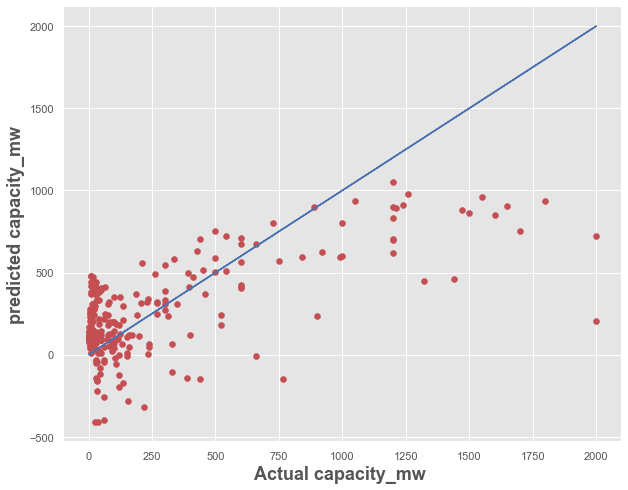

In [96]:
plt.figure(figsize=(10,8))
plt.scatter(x=y_test_b, y= ls_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw ', fontsize= 18,fontweight='bold' )
plt.ylabel('predicted capacity_mw', fontsize= 18,fontweight='bold')
plt.show()

**R2 score: 45.060933967027104**

**Cross validation score : 41.03676944151258**

*Both score has big difference i.e model is not performing good*

### 3.Ridge

In [97]:
rd=Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred=rd.predict(x_test_b)

rds=r2_score(y_test_b,rd_pred)
print('r2 score:',rds*100)

rdcvscore= cross_val_score(rd,x,y,cv=5,scoring='r2')
rdcv=rdscore.mean()
print('Cross validation score :',rdcv*100)

r2 score: 45.646632194663795
Cross validation score : 42.158306291352936


In [98]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test_b,rd_pred))
print('Mean squared error :', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))
print('\n')

 Error :
Mean absolute error : 211.8764541474433
Mean squared error : 93425.11944956702
Root Mean Squared Error: 305.6552297108083




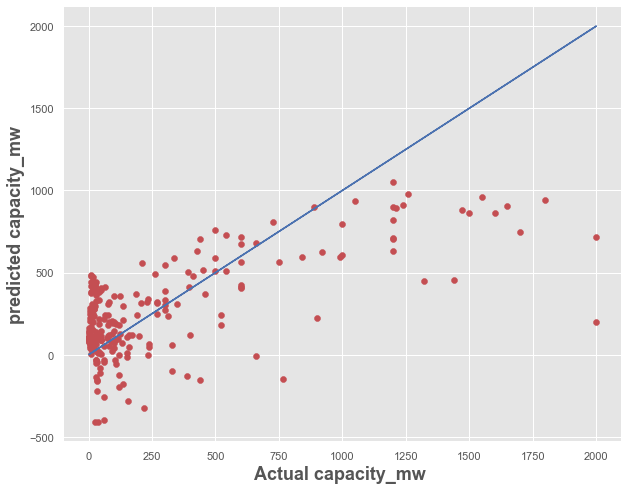

In [99]:
plt.figure(figsize=(10,8))
plt.scatter(x=y_test_b, y= rd_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw ', fontsize= 18,fontweight='bold' )
plt.ylabel('predicted capacity_mw', fontsize= 18,fontweight='bold')
plt.show()

**r2 score: 44.981030020725356**

**Cross validation score : 41.03676944151258**

*Model is not performing well*

In [100]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train_b, y_train_b)
dtr.score(x_train_b, y_train_b)
dtr_pred=dtr.predict(x_test_b)

dt_s=r2_score(y_test_b,dtr_pred)
print('r2 score:',dt_s*100)

dtrcvscore= cross_val_score(dtr,x,y,cv=5,scoring='r2')
dtrcv=dtrcvscore.mean()
print('Cross validation score :',dtrcv*100)

r2 score: 59.91104945698778
Cross validation score : 57.81783538422738


In [101]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test_b,dtr_pred))
print('Mean squared error :', mean_squared_error(y_test_b,dtr_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_b,dtr_pred)))
print('\n')

 Error :
Mean absolute error : 124.54539358974358
Mean squared error : 68906.76961365769
Root Mean Squared Error: 262.5009897384345




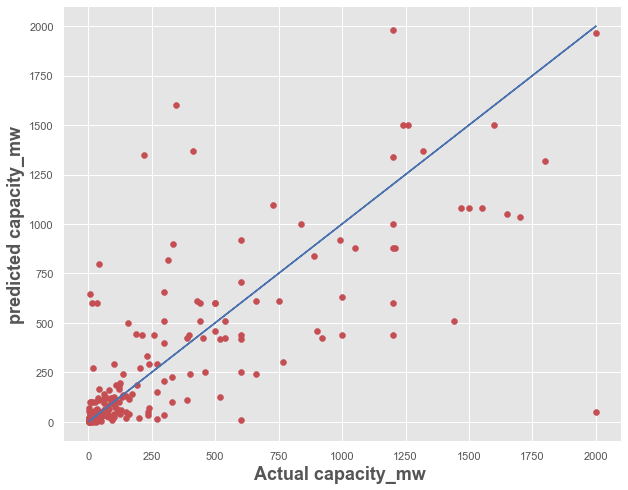

In [102]:
plt.figure(figsize=(10,8))
plt.scatter(x=y_test_b, y= dtr_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw ', fontsize= 18,fontweight='bold' )
plt.ylabel('predicted capacity_mw', fontsize= 18,fontweight='bold')
plt.show()

### 4.KNeihborsRegressor

In [103]:
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b, y_train_b)
kn_pred=kn.predict(x_test_b)

kn_s=r2_score(y_test_b,kn_pred)
print('r2 score:',kn_s*100)

kncvscore= cross_val_score(kn,x,y,cv=5,scoring='r2')
kncv=kncvscore.mean()
print('Cross validation score :',kncv*100) 

r2 score: 70.21560129053918
Cross validation score : 73.98289287238477


In [104]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test_b,kn_pred))
print('Mean squared error :', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))
print('\n')

 Error :
Mean absolute error : 107.79801538461537
Mean squared error : 51194.822317739076
Root Mean Squared Error: 226.26272852093663




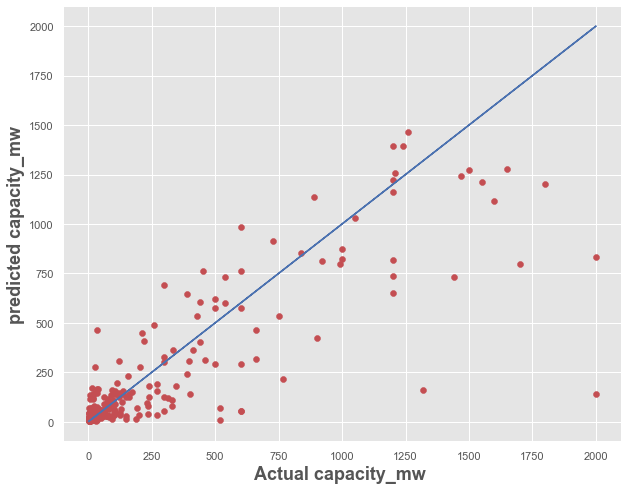

In [105]:
plt.figure(figsize=(10,8))
plt.scatter(x=y_test_b, y= kn_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw ', fontsize= 18,fontweight='bold' )
plt.ylabel('predicted capacity_mw', fontsize= 18,fontweight='bold')
plt.show()

### 5.Ensemble Techniques

In [106]:
rf=RandomForestRegressor()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b, y_train_b)
rf_pred=rf.predict(x_test_b)

rf_s=r2_score(y_test_b,rf_pred)
print('r2 score:',rf_s*100)

rfcvscore= cross_val_score(rf,x,y,cv=5,scoring='r2')
rfcv=rfcvscore.mean()
print('Cross validation score :',rfcv*100) 

r2 score: 74.45717372740998
Cross validation score : 77.79536041031953


In [107]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test_b,rf_pred))
print('Mean squared error :', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))
print('\n')

 Error :
Mean absolute error : 98.61869857981537
Mean squared error : 43904.20855139688
Root Mean Squared Error: 209.53331131683305




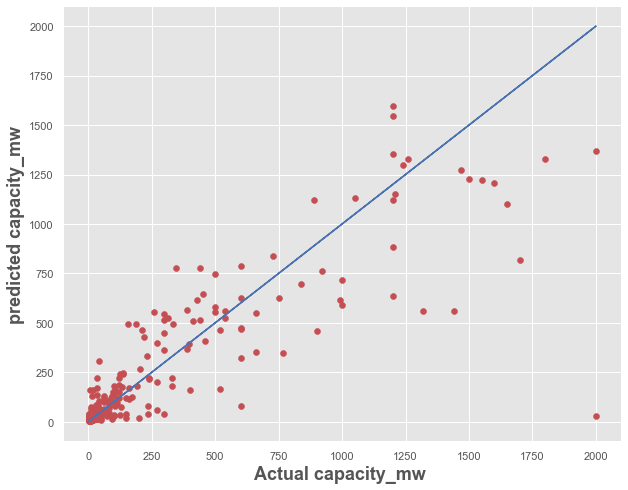

In [108]:
plt.figure(figsize=(10,8))
plt.scatter(x=y_test_b, y= rf_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw ', fontsize= 18,fontweight='bold' )
plt.ylabel('predicted capacity_mw', fontsize= 18,fontweight='bold')
plt.show()

**r2 score: 75.43019837355092**

**Cross validation score : 77.44727434696367**

*Diffrence in the scores are very less as compare to other models, Hence we can consider it best model.*

### 6. GradientBoostingRegressor

In [109]:
from  sklearn.ensemble import GradientBoostingRegressor
gbd=GradientBoostingRegressor()
gbd.fit(x_train_b, y_train_b)
gbd.score(x_train_b, y_train_b)
gbd_pred=rf.predict(x_test_b)

gbd_s=r2_score(y_test_b,rf_pred)
print('r2 score:',gbd_s*100)

gbdcvscore= cross_val_score(gbd,x,y,cv=5,scoring='r2')
gbdcv=rfcvscore.mean()
print('Cross validation score :',gbdcv*100) 

r2 score: 74.45717372740998
Cross validation score : 77.79536041031953


In [110]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test_b,gbd_pred))
print('Mean squared error :', mean_squared_error(y_test_b,gbd_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_b,gbd_pred)))
print('\n')

 Error :
Mean absolute error : 98.61869857981537
Mean squared error : 43904.20855139688
Root Mean Squared Error: 209.53331131683305




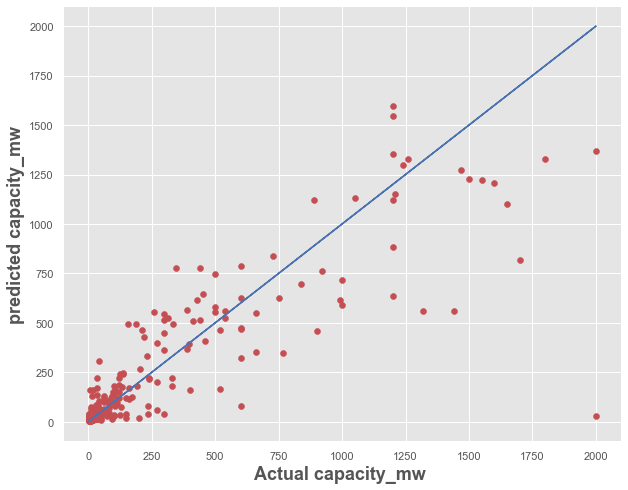

In [111]:
plt.figure(figsize=(10,8))
plt.scatter(x=y_test_b, y= gbd_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw ', fontsize= 18,fontweight='bold' )
plt.ylabel('predicted capacity_mw', fontsize= 18,fontweight='bold')
plt.show()

###### RandomForestRegressor is stil the best model with R2 score: 75.43019837355092 Cross val Score :  77.44727434696367, lets try Hypertuning of the model.

## Hyper Parameter Tuning : GridSearchCV

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
parameters={'criterion':['mse', 'absolute_error','squared_error','poisson'],'max_features':['auto', 'sqrt', 'log2'],'n_estimators':[100,200,300,400,500], 'min_samples_split':[1,2,3,4,10]}
rf=RandomForestRegressor()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'absolute_error', 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100}


In [114]:
rf=RandomForestRegressor(criterion='poisson',max_features='sqrt',min_samples_split=4, n_estimators=200)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b, y_train_b)
rf_pred=rf.predict(x_test_b)

rf_s=r2_score(y_test_b,rf_pred)
print('r2 score:',rf_s*100)

rfcvscore= cross_val_score(rf,x,y,cv=5,scoring='r2')
rfcv=rfcvscore.mean()
print('Cross validation score :',rfcv*100) 

r2 score: 75.9458092257126
Cross validation score : 78.66444276617003


In [115]:
f=RandomForestRegressor(criterion='poisson', max_features='sqrt', min_samples_split=4, n_estimators=200)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b, y_train_b)
rf_pred=rf.predict(x_test_b)

rf_s=r2_score(y_test_b,rf_pred)
print('r2 score:',rf_s*100)

rfcvscore= cross_val_score(rf,x,y,cv=5,scoring='r2')
rfcv=rfcvscore.mean()
print('Cross validation score :',rfcv*100) 

r2 score: 76.41746855957655
Cross validation score : 79.23275284531725


#### We can observe that RandomForestRegressor having very less difference between r2 score and cross validation score , so we can say that it is our best model. 

### Saving Model

In [116]:
import pickle
file_name='global_power_plant_regrssion.pkl'
pickle.dump(rf,open(file_name,'wb'))

In [117]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df2=pd.DataFrame({'original':a,'predicted':predicted},index= range(len(a)))
df2

,original,predicted
0,15.20,42.168935
1,60.00,66.815663
2,396.00,394.840682
3,1.00,9.473165
4,3.75,15.925056
...,...,...
255,75.00,48.885802
256,440.00,761.865315
257,24.00,23.389297
258,15.00,51.703232


## Predicting - Primary_Fuel

In [118]:
df1

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,801.123775,711.181225,737.205450,817.977250,751.644375


In [119]:
df1.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [120]:
#dividing into features and target
x=df1.drop('primary_fuel',axis=1)
y=df1['primary_fuel']

In [121]:
x.skew()

capacity_mw            2.029125
latitude              -0.125873
longitude              0.963197
generation_gwh_2014    2.997212
generation_gwh_2015    2.798104
generation_gwh_2016    2.736037
generation_gwh_2017    2.633766
generation_gwh_2018    2.701508
dtype: float64

In [122]:
from sklearn.preprocessing import power_transform
x=power_transform(x, method='yeo-johnson')

In [123]:
X1=pd.DataFrame(data=x)

### Scaling the data using StandardScaler

In [124]:
from sklearn.preprocessing import StandardScaler
SDc=StandardScaler()
X1=SDc.fit_transform(X1)

In [125]:
X1

array([[-1.6833227 ,  1.15245001, -0.9305924 , ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [ 0.24978411,  0.58438484, -0.50721006, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [-0.25138397,  0.11326215, -2.39331825, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       ...,
       [-0.48802138, -0.95817084, -0.23122659, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [ 0.13943645,  0.5155914 , -0.7686975 , ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [-0.72678912, -1.79626754,  0.25443587, ..., -0.02668675,
        -0.0118393 , -0.03537354]])

### Checking Multicollinearity

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
df1.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [128]:
dfy=pd.DataFrame(data=X1, columns=['capacity_mw', 'latitude', 'longitude',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'])

In [129]:
dfy

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.683323,1.152450,-0.930592,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
1,0.249784,0.584385,-0.507210,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
2,-0.251384,0.113262,-2.393318,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
3,0.422961,0.436584,2.416901,-0.249081,0.115639,0.126619,-0.178492,-0.175228
4,1.768702,0.122517,1.254499,1.448967,2.320849,2.317527,2.037720,2.431710
...,...,...,...,...,...,...,...,...
861,1.709760,-0.795433,0.225597,-0.023489,-2.472611,-0.831122,0.034848,-0.105704
862,-1.602083,-1.335323,0.415293,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
863,-0.488021,-0.958171,-0.231227,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
864,0.139436,0.515591,-0.768697,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374


In [130]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [131]:
calc_vif(dfy)

,variables,VIF FACTOR
0,capacity_mw,1.283854
1,latitude,1.024053
2,longitude,1.153016
3,generation_gwh_2014,3.582219
4,generation_gwh_2015,6.285277
5,generation_gwh_2016,10.751595
6,generation_gwh_2017,9.760340
7,generation_gwh_2018,9.242550


In [132]:
dfy.drop('generation_gwh_2016',axis=1, inplace=True)

In [133]:
calc_vif(dfy)

,variables,VIF FACTOR
0,capacity_mw,1.283368
1,latitude,1.021341
2,longitude,1.147317
3,generation_gwh_2014,3.579530
4,generation_gwh_2015,4.384868
5,generation_gwh_2017,8.517090
6,generation_gwh_2018,8.648025


In [134]:
x=dfy

## Machine Learning & Model Building

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


### 1. LogisticRegression()

In [137]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)

At Random state  72 The Model performing Well
At Random State 72
Training Accuracy score is- 50.57803468208093
Testing Accuracy Score is- 50.57471264367817
At Random state  163 The Model performing Well
At Random State 163
Training Accuracy score is- 51.73410404624278
Testing Accuracy Score is- 51.724137931034484
At Random state  314 The Model performing Well
At Random State 314
Training Accuracy score is- 50.57803468208093
Testing Accuracy Score is- 50.57471264367817
At Random state  522 The Model performing Well
At Random State 522
Training Accuracy score is- 51.73410404624278
Testing Accuracy Score is- 51.724137931034484
At Random state  537 The Model performing Well
At Random State 537
Training Accuracy score is- 50.57803468208093
Testing Accuracy Score is- 50.57471264367817
At Random state  810 The Model performing Well
At Random State 810
Training Accuracy score is- 51.73410404624278
Testing Accuracy Score is- 51.724137931034484
At Random state  979 The Model performing Well
At R

In [138]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y, test_size=0.20, random_state= 163)

In [139]:
lr.fit(x_train_b,y_train_b)
lr_pred=lr.predict(x_test_b)

print('Logistic model accuracy is -',r2_score(y_test_b,pred_test))

Logistic model accuracy is - -0.7328057109426869


In [140]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[ 0  0  0  1  0  0  2  6]
 [ 0 34  2 17  0  0  1  2]
 [ 0  1  3  4  0  0  0  1]
 [ 0 11  2 26  0  0  8  5]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  2]
 [ 0  0  0  3  0  0 14  1]
 [ 0  0  0  7  0  0  4 13]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.69      0.61      0.65        56
           2       0.38      0.33      0.35         9
           3       0.45      0.50      0.47        52
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.48      0.78      0.60        18
           7       0.43      0.54      0.48        24

    accuracy                           0.52       174
   macro avg       0.30      0.34      0.32       174
weighted avg       0.49      0.52      0.50       174



### Cross-Validation of model

In [141]:
lr_pred=lr.predict(x_test_b)

from sklearn.model_selection import cross_val_score
lr_s=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv=cross_val_score(lr,x,y,cv=j, scoring='accuracy')
    lr_cvscore=lr_cv.mean()
    print('At cv -',j)
    print('Cross Validation Score is  ',lr_cvscore*100)
    print('Accuracy score -',lr_s*100)
    print('\n')

At cv - 2
Cross Validation Score is   49.19168591224019
Accuracy score - 51.724137931034484


At cv - 3
Cross Validation Score is   49.6499743688325
Accuracy score - 51.724137931034484


At cv - 4
Cross Validation Score is   49.53383683222393
Accuracy score - 51.724137931034484


At cv - 5
Cross Validation Score is   50.5740482359976
Accuracy score - 51.724137931034484


At cv - 6
Cross Validation Score is   50.22429757343551
Accuracy score - 51.724137931034484


At cv - 7
Cross Validation Score is   50.33719231201529
Accuracy score - 51.724137931034484


At cv - 8
Cross Validation Score is   50.45234454638125
Accuracy score - 51.724137931034484


At cv - 9
Cross Validation Score is   50.22312905689195
Accuracy score - 51.724137931034484




###### At cv=5 Cross validation score has less difference model is performing well.

### 2. SVC

In [142]:
from sklearn.svm import SVC

In [143]:
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_s=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_s*100)

svc_cv= cross_val_score(svc,x,y,cv=5, scoring='accuracy')
svc_cvscore=svc_cv.mean()
print('Cross val Score :', svc_cvscore*100)

Accuracy_core: 65.51724137931035
Cross val Score : 59.11500896950368


In [144]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[ 0  1  0  0  0  0  2  6]
 [ 0 43  1  5  0  0  1  6]
 [ 0  3  2  3  0  0  0  1]
 [ 1  5  0 35  0  0  4  7]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  2]
 [ 0  0  0  0  0  0 15  3]
 [ 0  2  0  0  0  0  3 19]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.75      0.77      0.76        56
           2       0.50      0.22      0.31         9
           3       0.81      0.67      0.74        52
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.60      0.83      0.70        18
           7       0.43      0.79      0.56        24

    accuracy                           0.66       174
   macro avg       0.39      0.41      0.38       174
weighted avg       0.63      0.66      0.63       174



**Accuracy_core: 65.51724137931035**

**Cross val Score : 59.11500896950368**

*Model performance is poor*

### 3.KNeighborsClassifier

In [145]:
from sklearn.neighbors import KNeighborsClassifier

In [146]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_s= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_s*100)

kncvscore=cross_val_score(kn,x,y, cv=8, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 66.66666666666666
Cross val Score : 65.82887359836901


In [147]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[ 3  2  0  0  0  0  1  3]
 [ 3 42  1  6  0  0  3  1]
 [ 0  4  1  2  0  1  1  0]
 [ 2  3  2 41  0  0  2  2]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  2  0  0  1  0  0]
 [ 1  2  0  1  0  0 13  1]
 [ 1  1  1  0  0  0  6 15]]
              precision    recall  f1-score   support

           0       0.30      0.33      0.32         9
           1       0.74      0.75      0.74        56
           2       0.14      0.11      0.12         9
           3       0.82      0.79      0.80        52
           4       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       0.50      0.72      0.59        18
           7       0.68      0.62      0.65        24

    accuracy                           0.67       174
   macro avg       0.46      0.46      0.45       174
weighted avg       0.66      0.67      0.66       174



**accuracy_score: 66.66666666666666**

**Cross val Score : 65.82887359836901**

*Model is performing well*

### 4. DecisionTreeClassifier

In [148]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train_b, y_train_b)
dtc.score(x_train_b, y_train_b)
dtc_pred=dtc.predict(x_test_b)

dt_s=accuracy_score(y_test_b,dtc_pred)
print('accuracy_score:',dt_s*100)

dtccvscore= cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
dtccv=dtccvscore.mean()
print('Cross validation score :',dtccv*100)

accuracy_score: 70.6896551724138
Cross validation score : 63.73928642615109


In [149]:
print(confusion_matrix(y_test_b, dtc_pred))
print(classification_report(y_test_b, dtc_pred))

[[ 3  4  0  1  0  0  1  0]
 [ 0 41  3  8  0  0  2  2]
 [ 0  1  6  0  1  1  0  0]
 [ 2  4  1 42  1  1  1  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  2  0  0  1  0  0]
 [ 1  0  0  1  0  0 14  2]
 [ 2  1  0  1  0  0  4 16]]
              precision    recall  f1-score   support

           0       0.38      0.33      0.35         9
           1       0.76      0.73      0.75        56
           2       0.50      0.67      0.57         9
           3       0.79      0.81      0.80        52
           4       0.00      0.00      0.00         3
           5       0.33      0.33      0.33         3
           6       0.64      0.78      0.70        18
           7       0.80      0.67      0.73        24

    accuracy                           0.71       174
   macro avg       0.52      0.54      0.53       174
weighted avg       0.71      0.71      0.71       174



### 5. RandomForestClassifier

In [150]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b, y_train_b)
rf_pred=rf.predict(x_test_b)

rf_s=accuracy_score(y_test_b,rf_pred)
print('accuracy_score:',rf_s*100)

rfcvscore= cross_val_score(rf,x,y,cv=5,scoring='accuracy')
rfcv=rfcvscore.mean()
print('Cross validation score :',rfcv*100) 

accuracy_score: 73.5632183908046
Cross validation score : 71.71018536974289


In [151]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[ 4  2  0  0  0  0  1  2]
 [ 0 44  4  5  0  0  1  2]
 [ 0  3  2  3  0  1  0  0]
 [ 2  3  0 47  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  2  0  0  1  0  0]
 [ 1  0  0  1  0  0 14  2]
 [ 0  1  0  1  0  0  6 16]]
              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.79      0.79      0.79        56
           2       0.25      0.22      0.24         9
           3       0.82      0.90      0.86        52
           4       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       0.64      0.78      0.70        18
           7       0.73      0.67      0.70        24

    accuracy                           0.74       174
   macro avg       0.54      0.52      0.52       174
weighted avg       0.72      0.74      0.72       174



**accuracy_score: 75.86206896551724**

**Cross validation score : 71.93940601953358**
*Model performance is good*

### 6. AdaBoostClassifier

In [152]:
ada=AdaBoostClassifier()
ada.fit(x_train_b, y_train_b)
ada.score(x_train_b, y_train_b)
ada_pred=ada.predict(x_test_b)

ada_s=accuracy_score(y_test_b,ada_pred)
print('accuracy_score:',ada_s*100)

adacvscore= cross_val_score(ada,x,y,cv=5,scoring='accuracy')
adacv=adacvscore.mean()
print('Cross validation score :',adacv*100) 

accuracy_score: 48.275862068965516
Cross validation score : 39.71829114344562


In [153]:
print(confusion_matrix(y_test_b, ada_pred))
print(classification_report(y_test_b, ada_pred))

[[ 0  0  0  8  0  0  1  0]
 [ 0 27  0 26  1  0  1  1]
 [ 0  4  0  5  0  0  0  0]
 [ 0  4  0 48  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  2  1  0  0  0]
 [ 0  0  0 11  0  0  7  0]
 [ 0  0  0 17  0  0  5  2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.71      0.48      0.57        56
           2       0.00      0.00      0.00         9
           3       0.41      0.92      0.57        52
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.50      0.39      0.44        18
           7       0.67      0.08      0.15        24

    accuracy                           0.48       174
   macro avg       0.29      0.23      0.22       174
weighted avg       0.49      0.48      0.42       174



### 7. GaussianNB

In [154]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_s=accuracy_score(y_test_b,gb_pred)
print('accuracy_score:',gb_s*100)

gbcvscore= cross_val_score(gb,x,y,cv=5,scoring='accuracy')
gbcv=gbcvscore.mean()
print('Cross validation score :',gbcv*100) 

accuracy_score: 58.620689655172406
Cross validation score : 53.46289283104112


###### RandomForestClassifier is best model.

### HyperParameter Tuning 

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [100,200, 300,400, 500, 800, 1200], 'criterion':['gini', 'entropy'], 'max_features':['auto','sqrt', 'log2'], 'min_samples_split':[2,4, 5, 10, 15, 100],'max_depth':[5, 8, 15, 25, 30] }
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'gini', 'max_depth': 30, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 200}


In [163]:
rf=RandomForestClassifier(criterion= 'gini', max_depth= 30, max_features= 'auto', min_samples_split= 2, n_estimators= 200)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b, y_train_b)
rf_pred=rf.predict(x_test_b)

rf_s=accuracy_score(y_test_b,rf_pred)
print('accuracy_score:',rf_s*100)

rfcvscore= cross_val_score(rf,x,y,cv=5,scoring='accuracy')
rfcv=rfcvscore.mean()
print('Cross validation score :',rfcv*100) 

accuracy_score: 75.86206896551724
Cross validation score : 72.39984054215667


#### RandomForestClassifier with accuracy_score: 75.86206896551724 Cross val Score : 72.39984054215667 is our best model.

In [164]:
import pickle
file_name='global_power_plant_logic.pkl'
pickle.dump(rf,open(file_name,'wb'))

In [165]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df2=pd.DataFrame({'original':a,'predicted':predicted},index= range(len(a)))
df2

,original,predicted
0,7,7
1,5,2
2,1,1
3,3,3
4,1,1
...,...,...
169,3,0
170,1,1
171,1,1
172,3,3
